### **Business problem**
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.

To address this issue we need to predict fraudulent credit card transactions with the help of machine learning models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# downloading data from kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:04<00:00, 23.4MB/s]
100% 66.0M/66.0M [00:04<00:00, 16.8MB/s]


In [4]:
#extracting zipfile
import zipfile
with zipfile.ZipFile('creditcardfraud.zip') as credit:
  credit.extractall()

In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import os
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [7]:
#shape
df.shape

(284807, 31)

In [8]:
# count of null values per column|
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#describe
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

## Observation
- From the above description we can observe that the average amount is 88.34 and 75 percentile of the amount lies below 77.165
- From the class description we can observe that the mean value for class column is 0.001727 which clearly suggests a class imbalance in the dataset

In [11]:
# distribution of classes
df.Class.value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [12]:
# value count of classes
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

[]

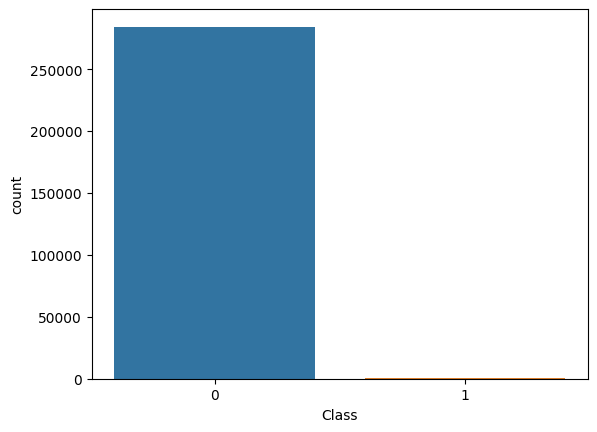

In [13]:
# countplot plot for number of fradulent vs non-fraudulent cases
sns.countplot(data=df, x='Class')
plt.plot()

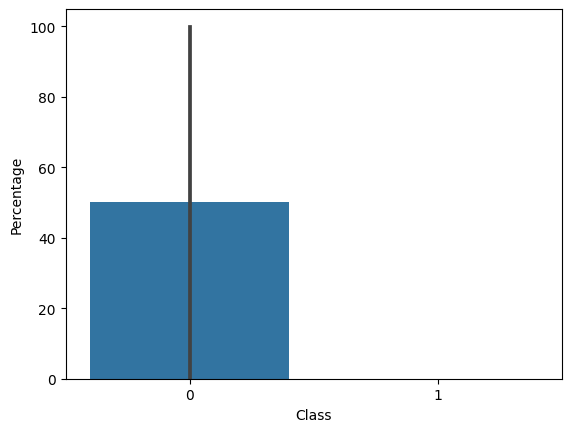

In [14]:
# bar plot for percentage of fradulent vs non-fraudulent cases
sns.barplot(data=df, x='Class', y=np.round(df.Class.value_counts(normalize=True)*100,2))
plt.ylabel('Percentage')
plt.show()

- From the above countplot and percentage plot we can clearly observe the class imbalance present in the data

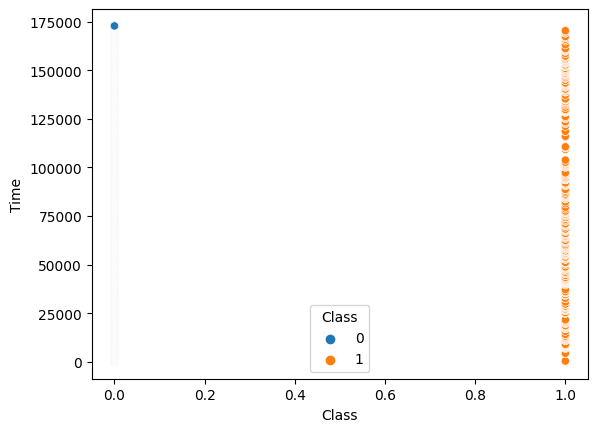

In [15]:
# scatter plot for classes vs time
sns.scatterplot(data=df, x='Class', y='Time', hue='Class')
plt.show()

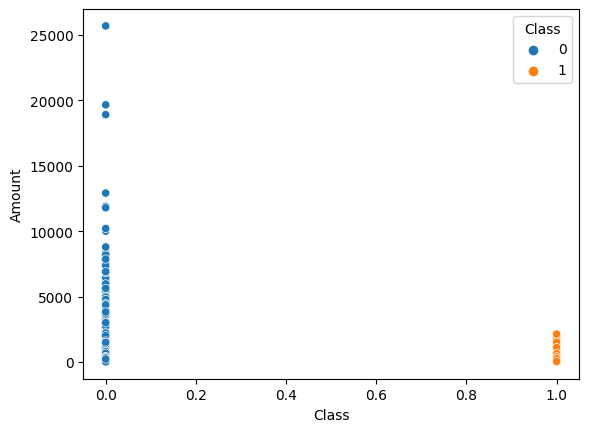

In [16]:
# scatterplot for distribution of classes with amount
sns.scatterplot(data = df, x='Class', y='Amount', hue='Class')
plt.show()

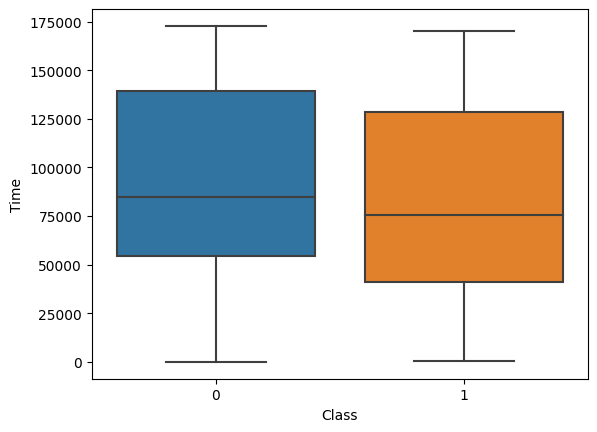

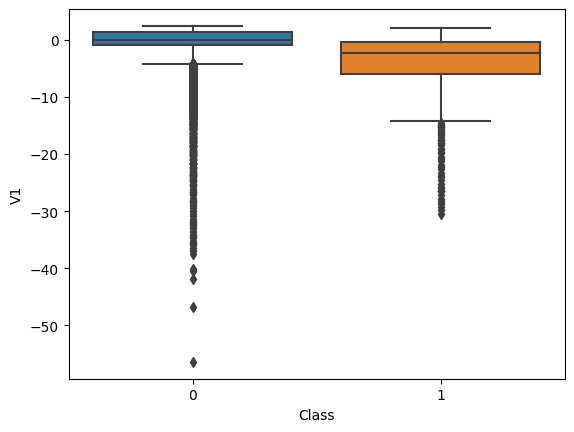

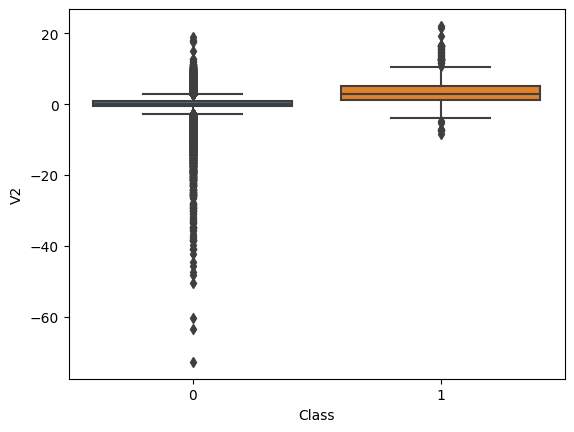

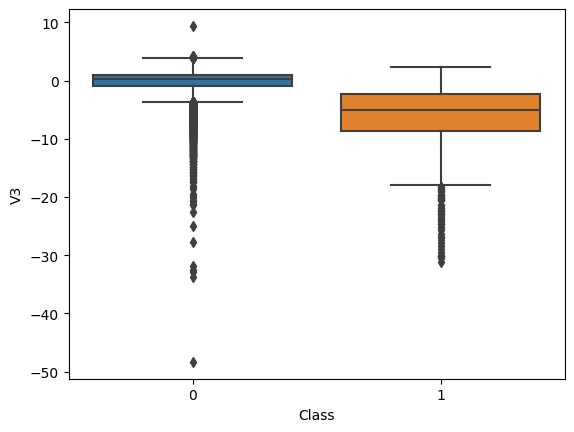

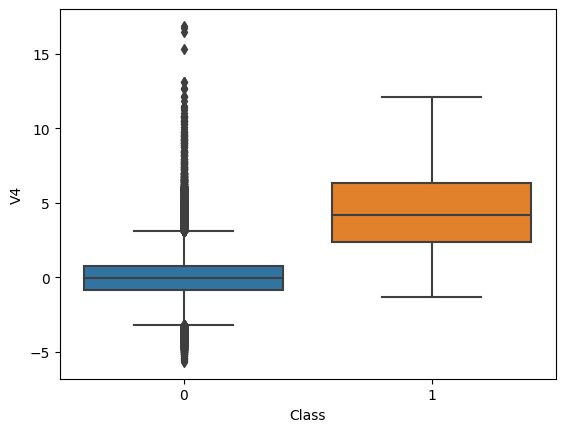

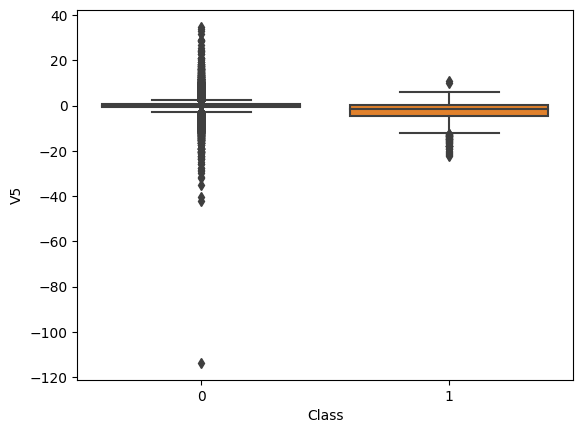

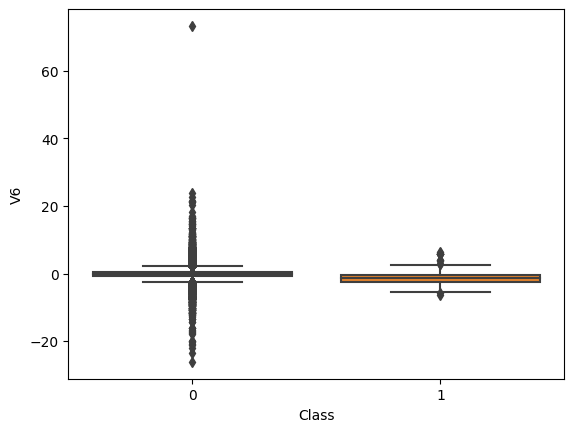

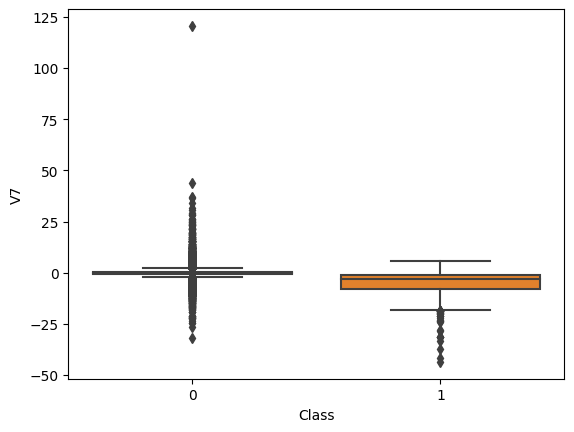

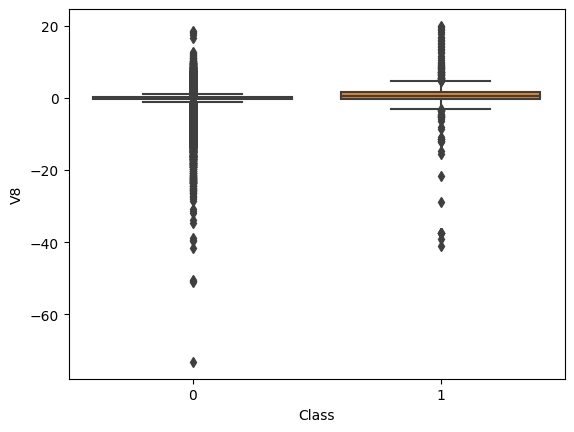

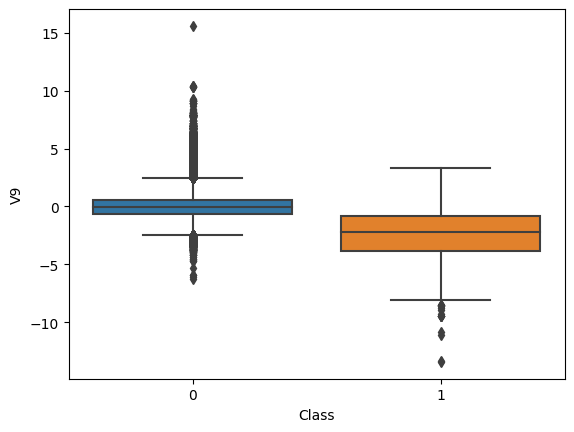

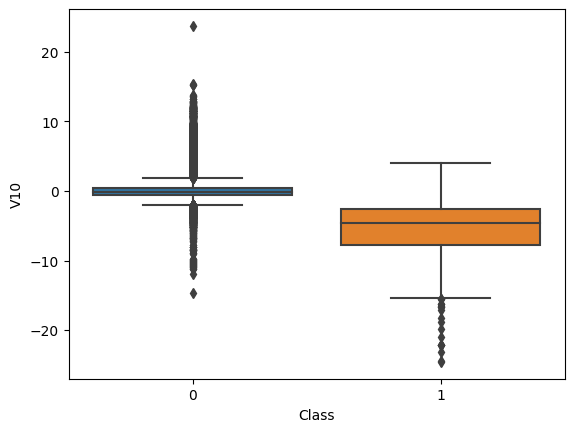

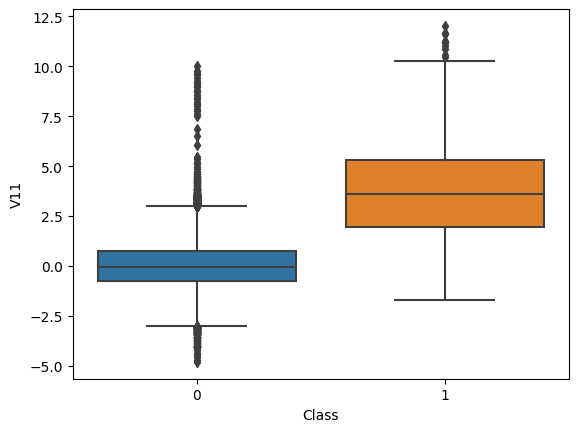

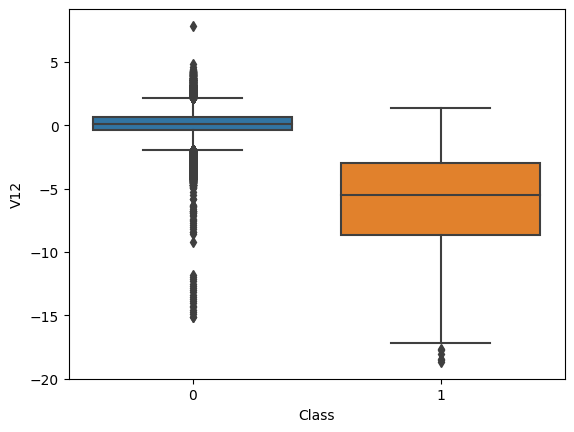

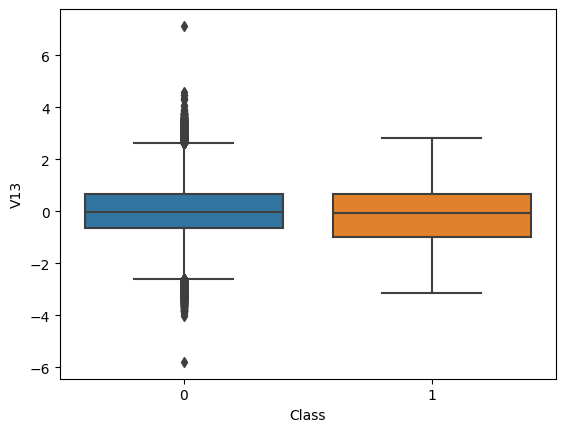

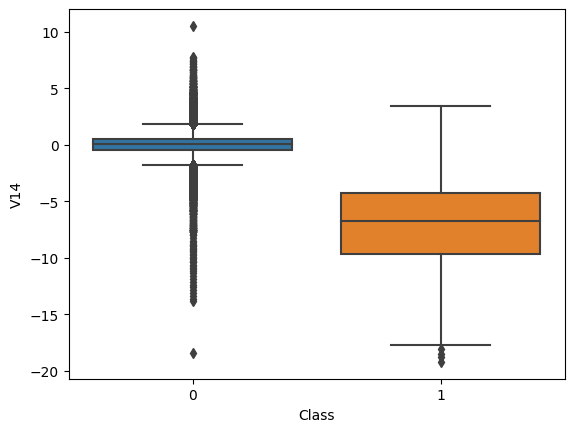

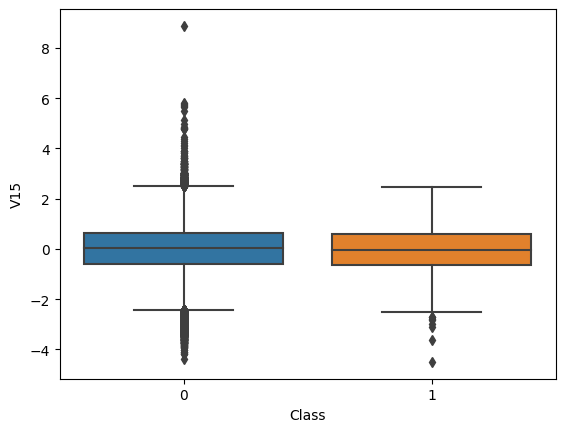

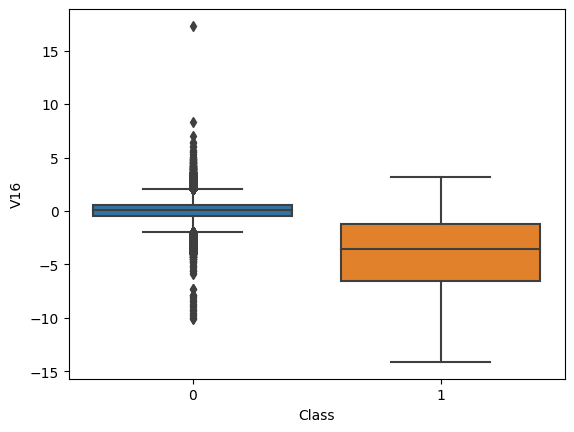

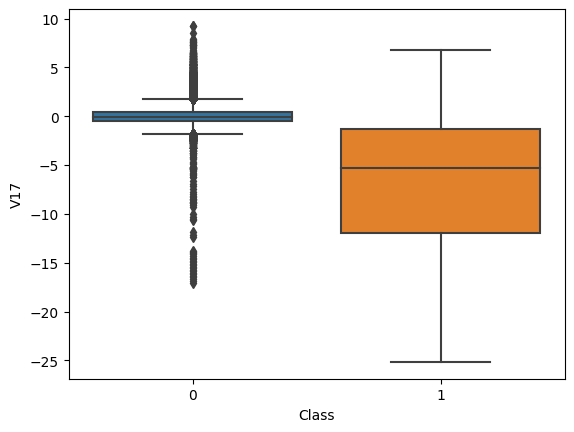

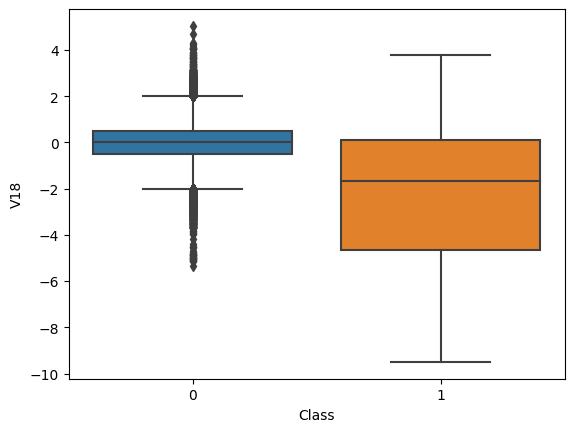

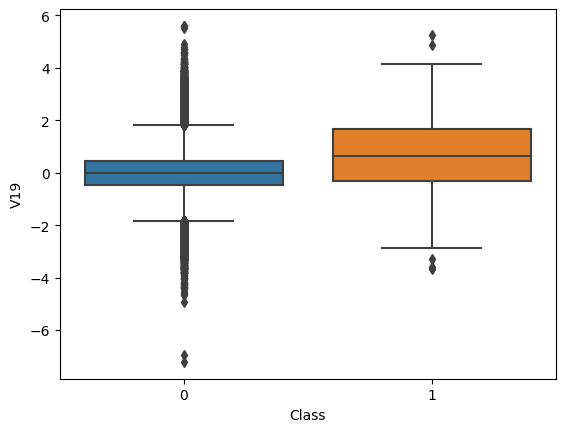

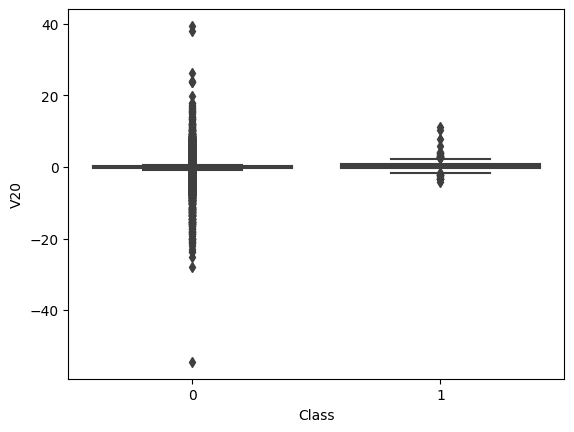

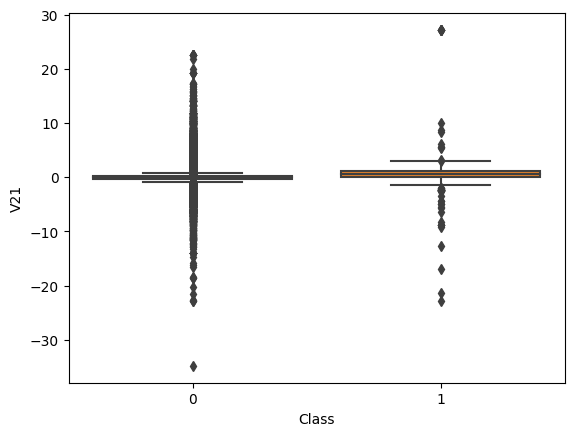

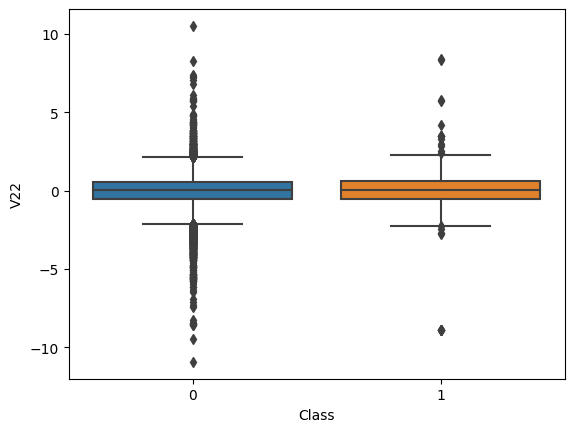

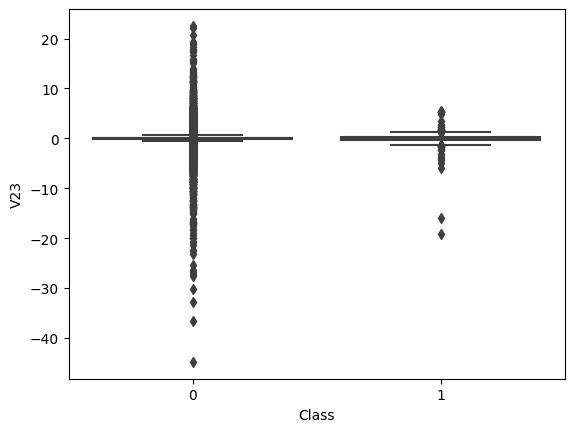

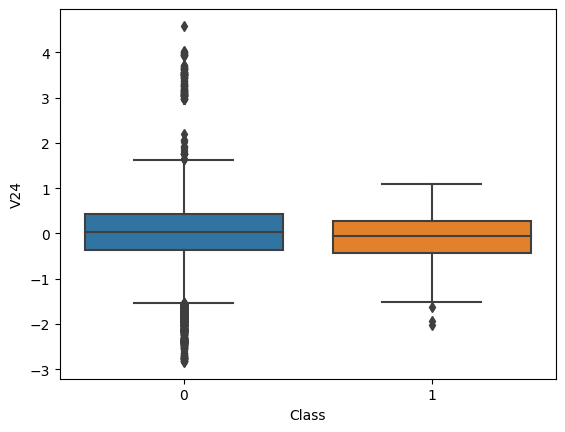

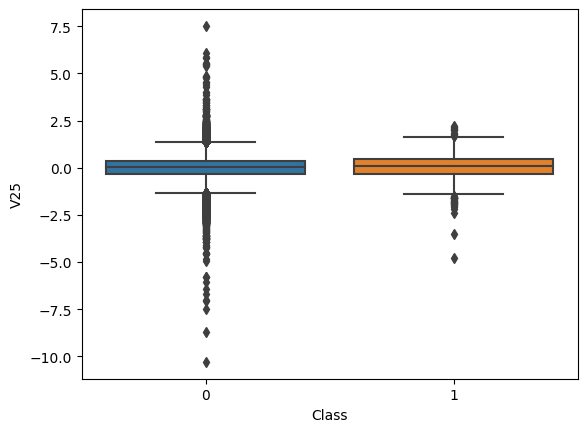

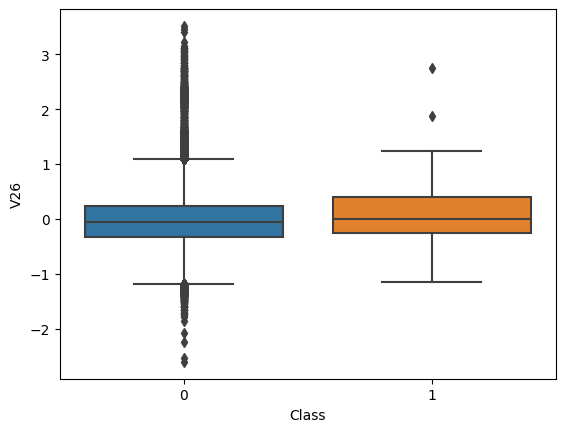

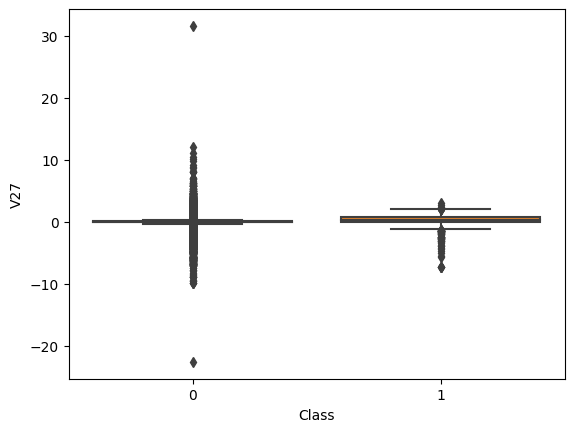

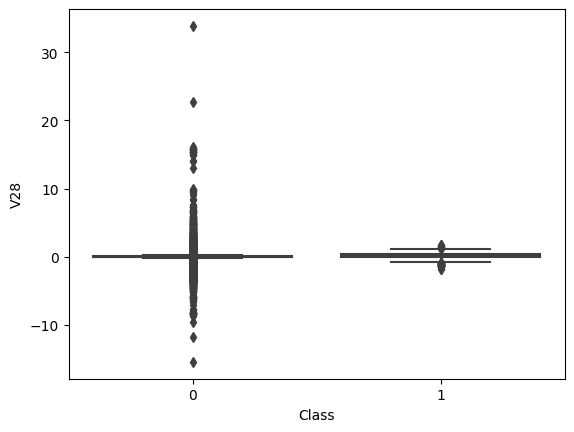

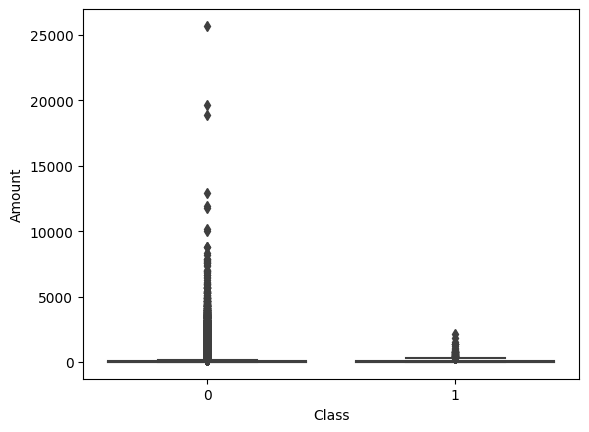

In [17]:
# box plots for comparison of classes with different variables
for i in df.columns:
  if i not in 'Class':
    sns.boxplot(data=df, x='Class', y=i)
    plt.show()

## Observation
- From the boxplot between class and amount we can observe that the amount range for class 0 is much higher compared to class 1 and is also continues with outliers
- From the boxplot betweeen feature V28 and class we can observe that the values for V28 seems to be equally nad widely spread for class 1 compared to class 0.
- For feature V26 we can observe that although the boxplot for both classes hav similar body size but for class 0 the values are more spread with outliers, and similar observations can be made for features like, V35, V24, V23, V22, V20.
- For feature V19 we can observe that the body of the boxplot for class 1 is larger and the median value is higher but the outliers are more spread with class 0
- For feature V18 the value for class 1 is more spread compared to class 0 but it has lower median value, similar observation can also be made for V17
- For V16 and V14 we can observe a lower median value for class 1
- For features V4 and V11 we can observe a higher median value for class 1.

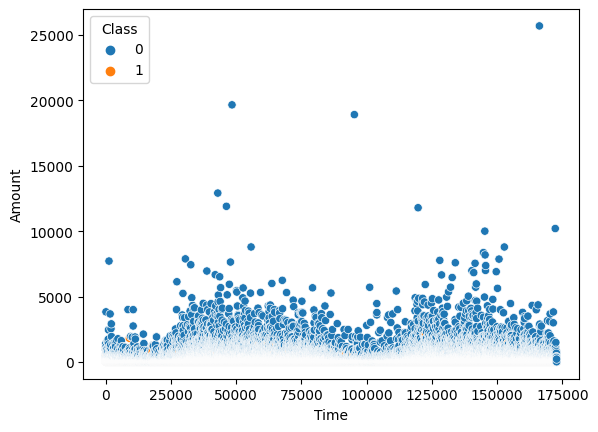

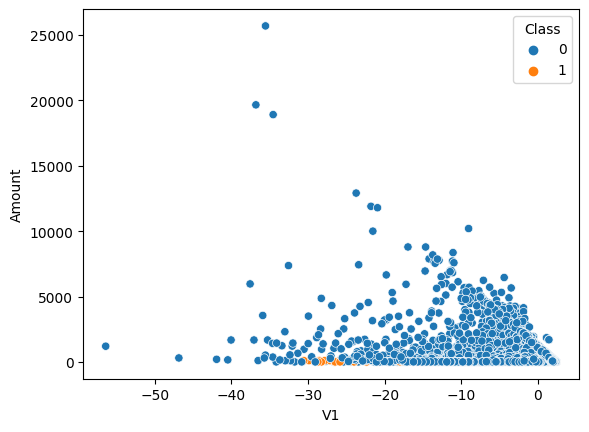

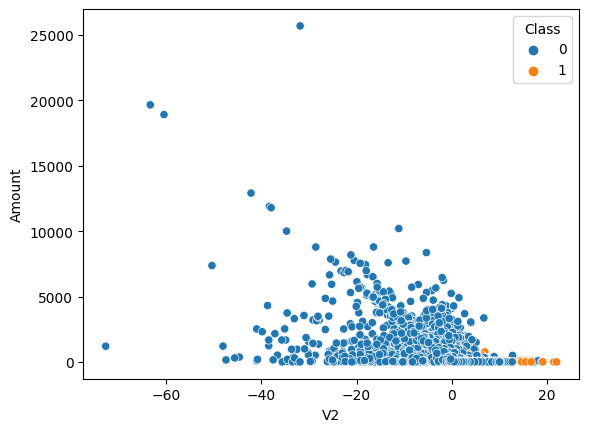

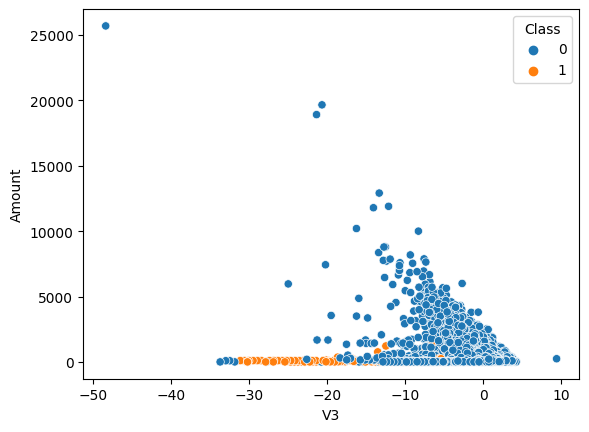

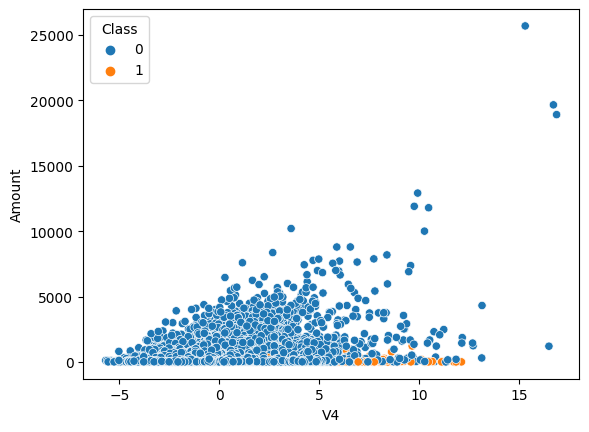

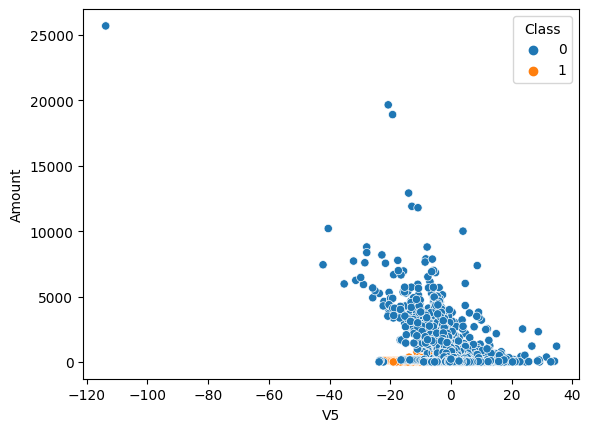

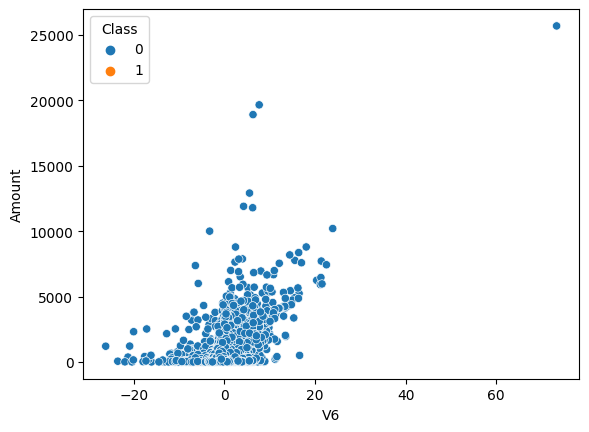

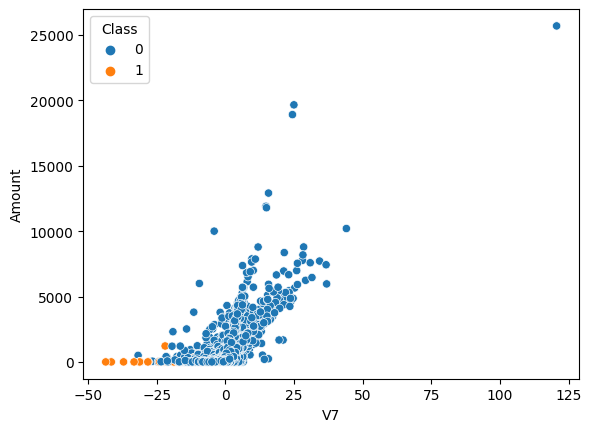

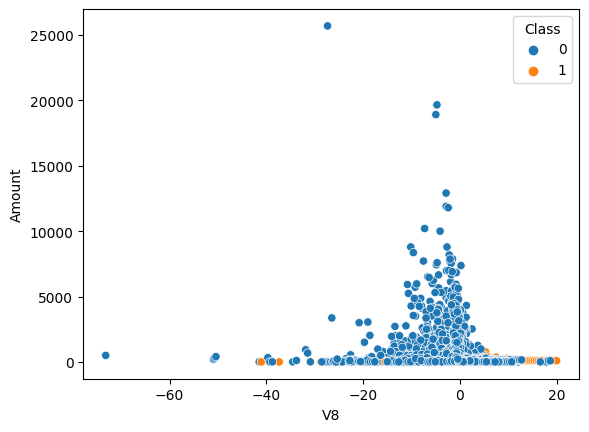

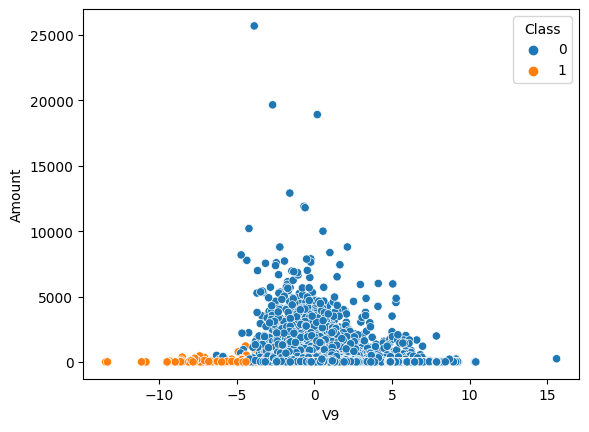

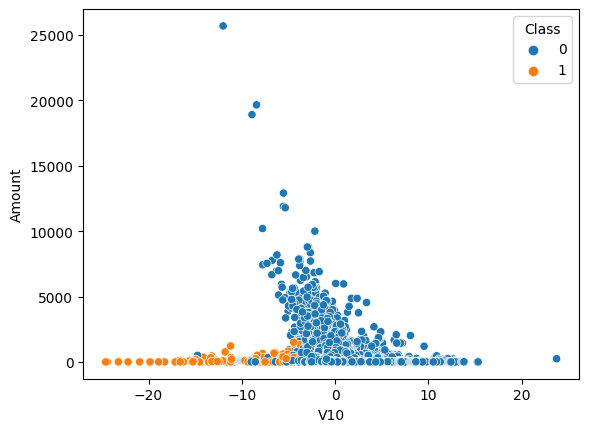

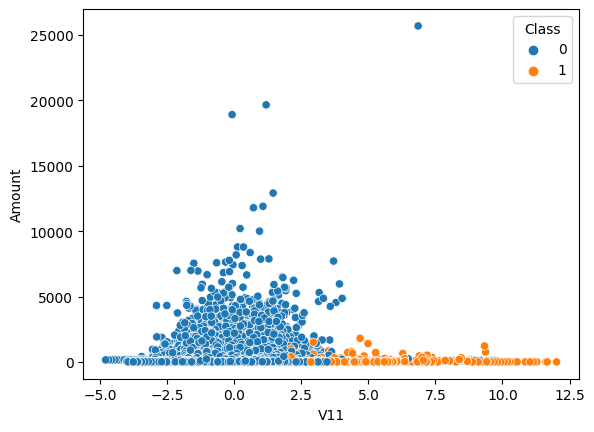

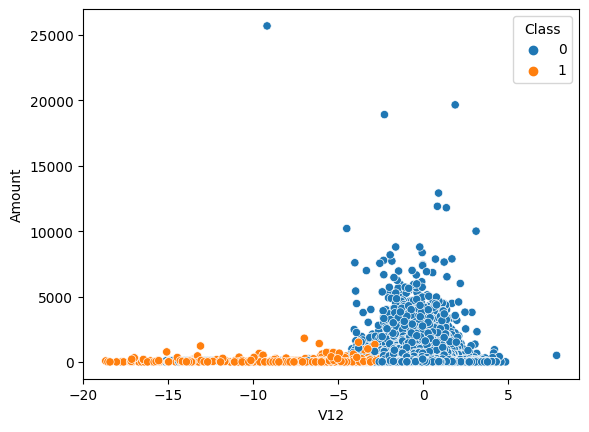

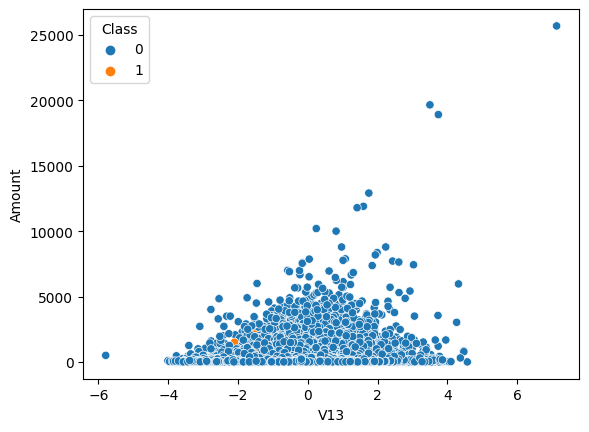

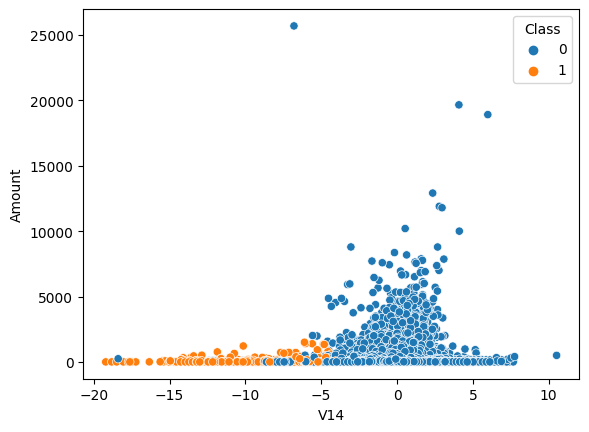

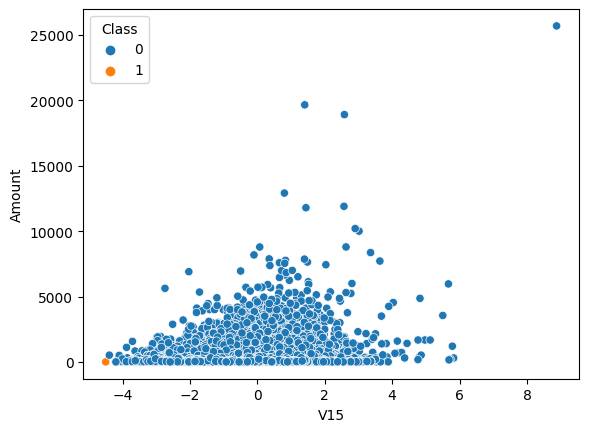

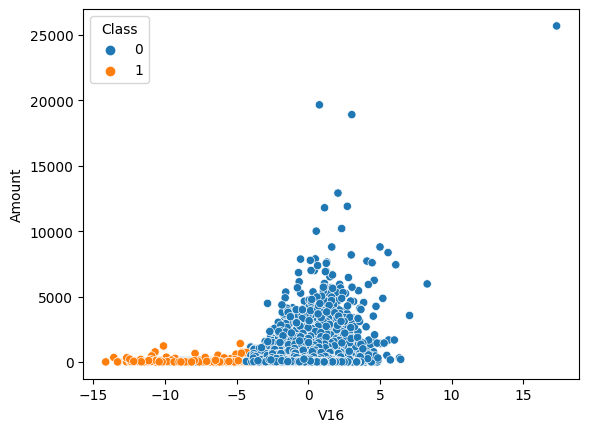

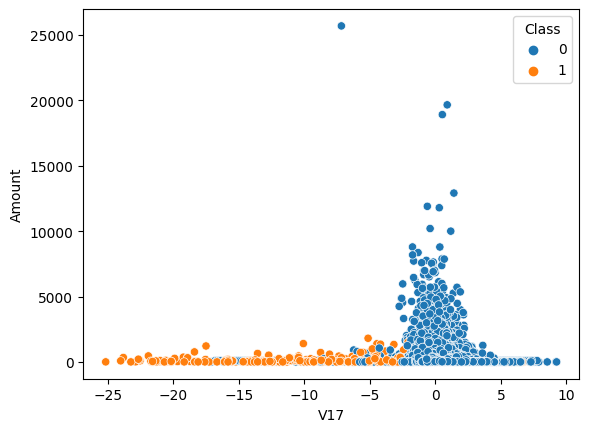

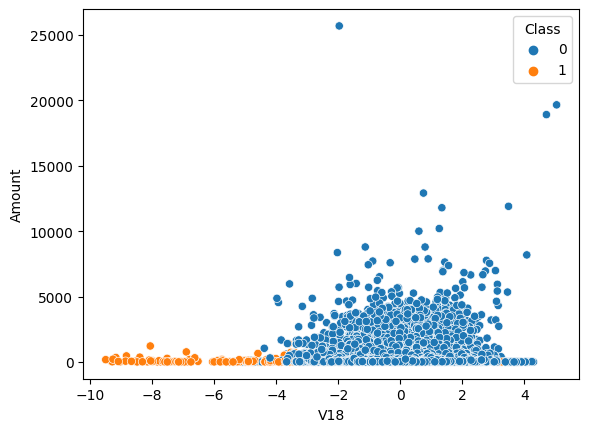

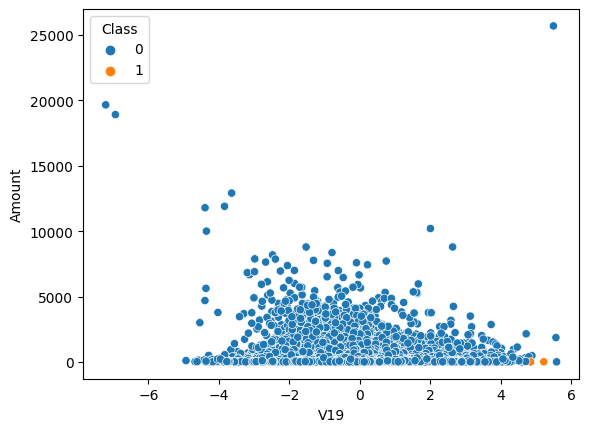

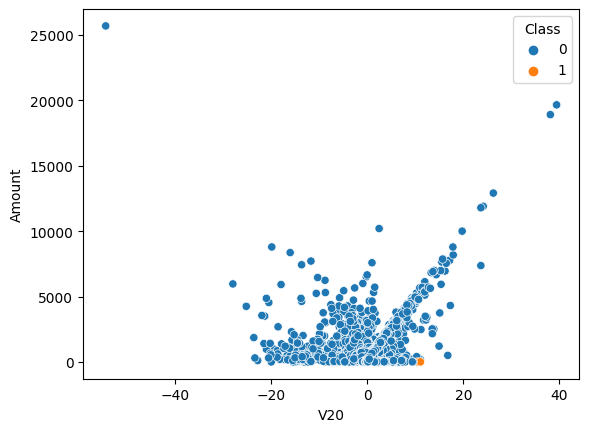

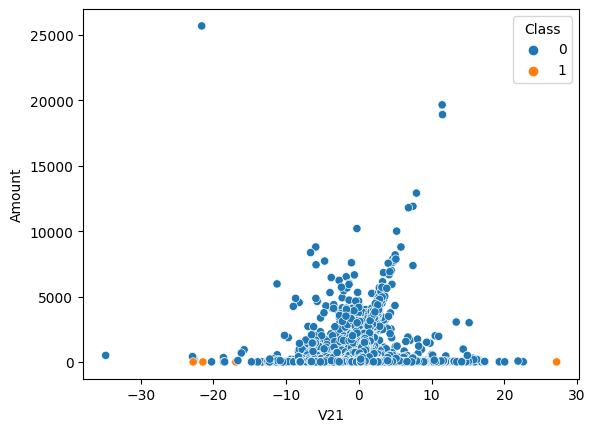

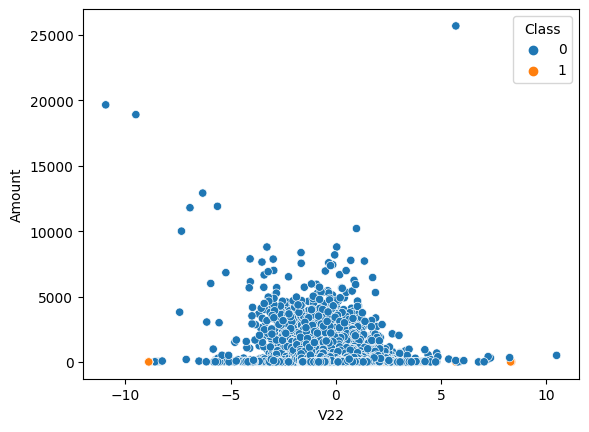

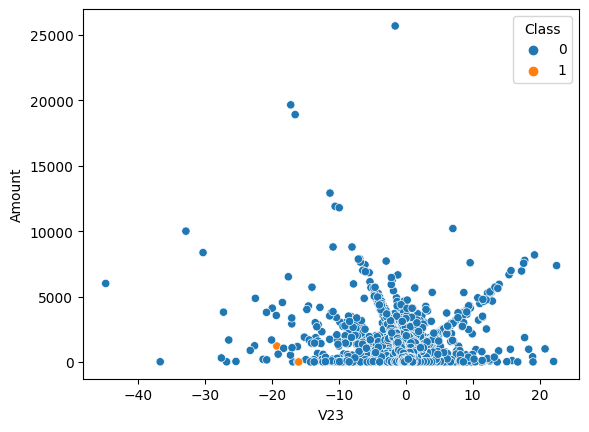

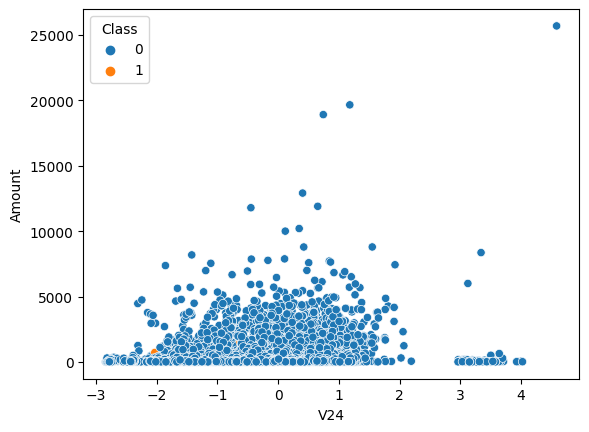

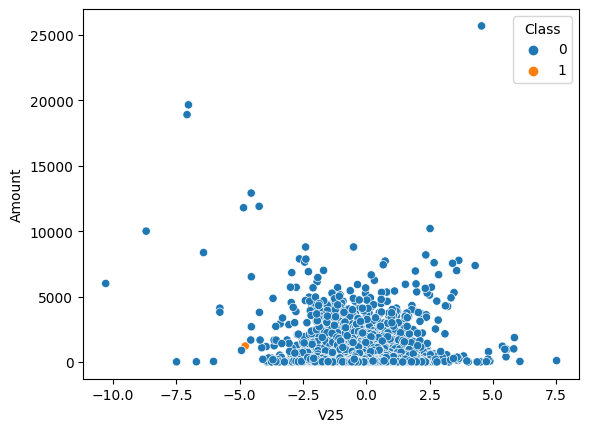

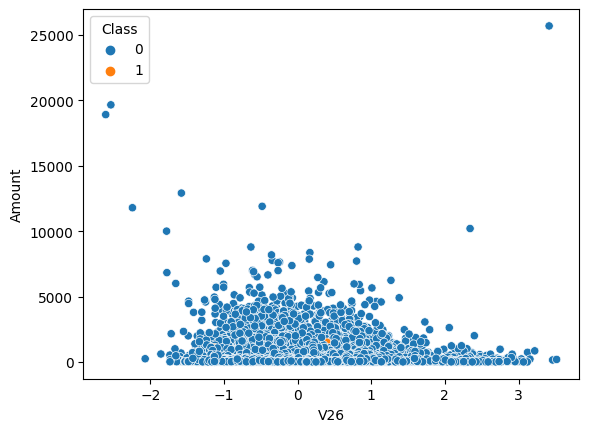

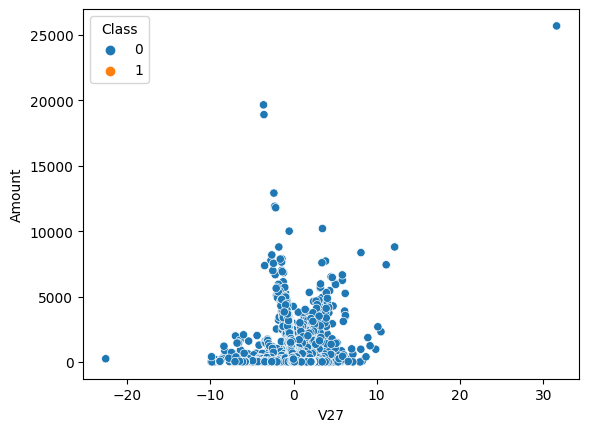

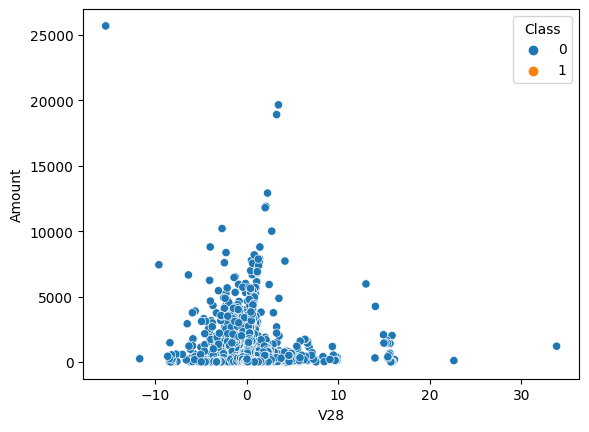

In [18]:
# scatterplot for variables in data
for i in df.columns:
  if i not in ['Class','Amount']:
    sns.scatterplot(data=df, x=i, y='Amount', hue='Class')
    plt.show()

## Observation
- For feature V18, V17,V16, V14, V12, V10, V9 vs Amount we can observe that class 1 values are spread on the left hand side of the graph.
- For feature V11 vs Amount we can observe that the class 1 values are spread towards the right hand side of the graph

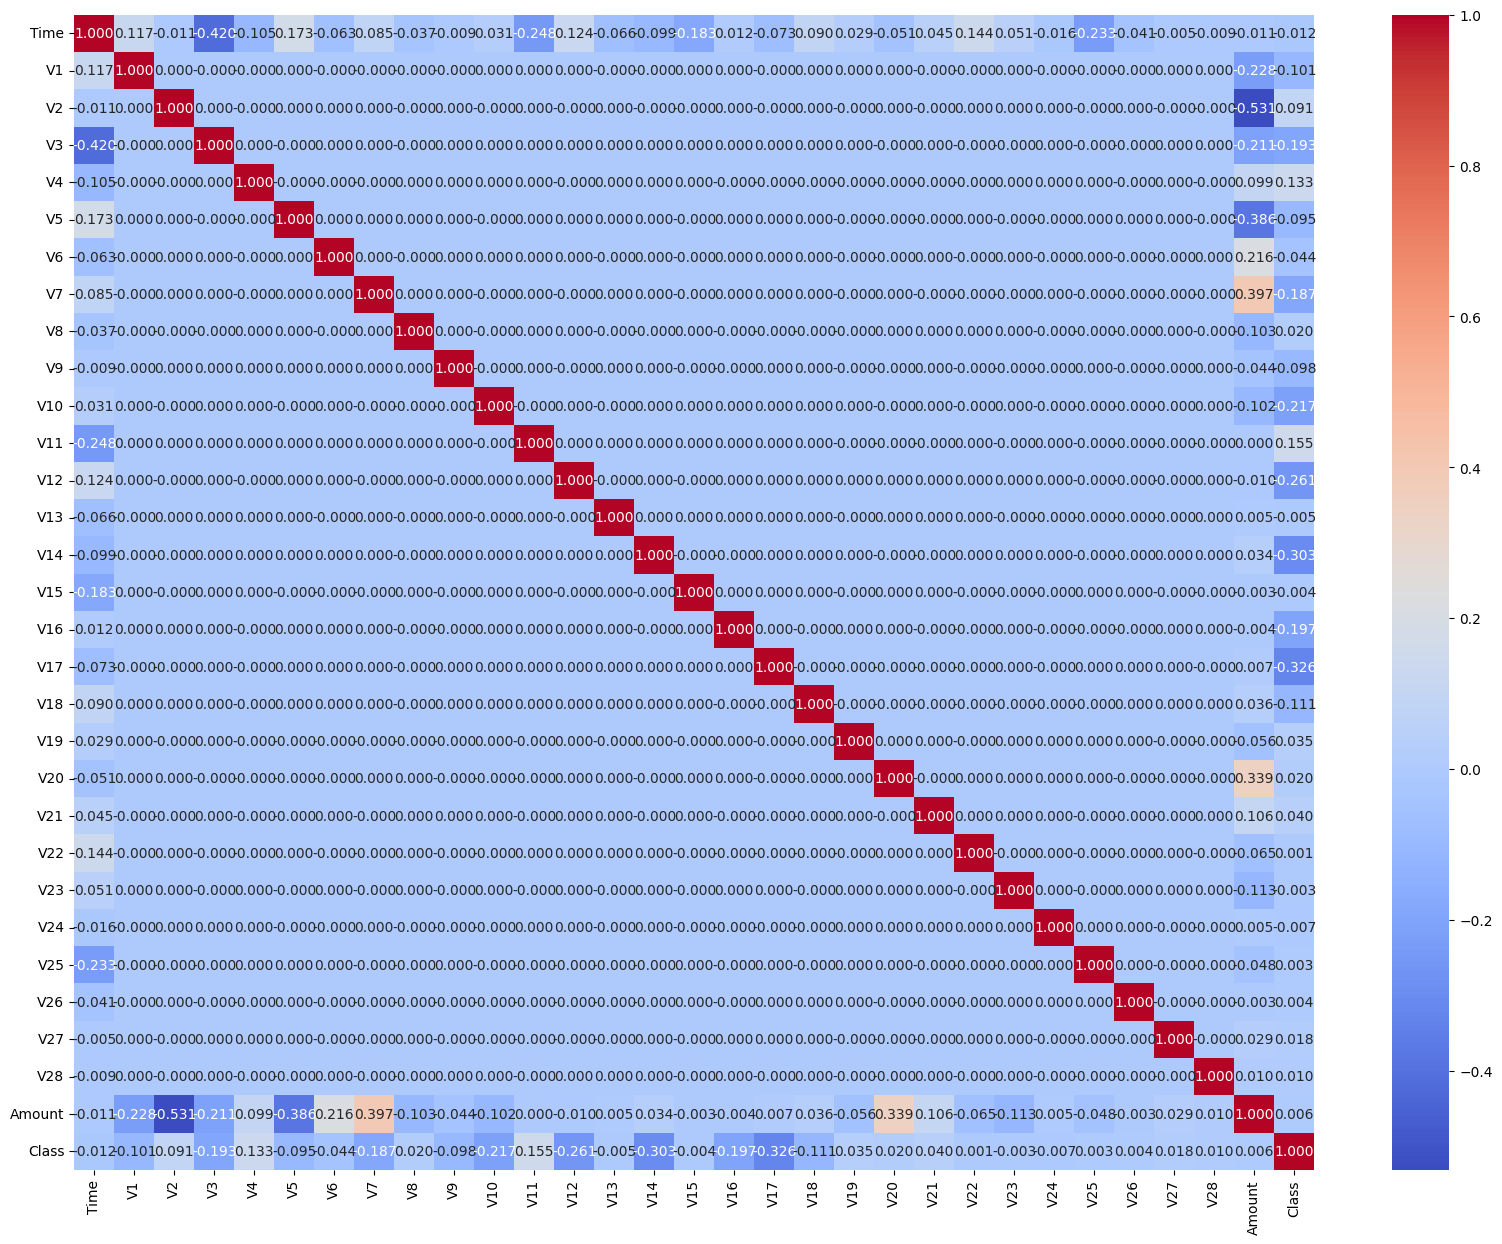

In [19]:
#heatmap
corr = df.corr()
plt.figure(figsize=[20,15])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

##Observation
- From the heatmap above we can notice that all the features are showing some amount of correlation with both class and amount

In [20]:
#dropping Time column as it is monotonically increasing
df.drop('Time', axis=1, inplace=True)

### Splitting the data into train and test data

In [21]:
y = df['Class'] #target variable
X = df.drop('Class', axis=1) #features

In [22]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  
0  149.62  
1    2.69  
2  378.66  
3  123.50  
4   69.99

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42, stratify=y)

In [25]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


In [26]:
#transforming the Amount column
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [27]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
17884  -0.840333 -0.526032  1.730303 -0.808008 -0.202882 -0.076848  0.056146   
232246 -3.756704 -0.853465 -0.449739 -2.423920 -0.407738 -0.107014  0.123247   
208554 -2.021166  1.590508 -0.539136 -1.551936  1.969969 -0.392371 -1.103548   
11464   1.377495 -0.437941  0.643866 -0.243826 -1.005476 -0.762567 -0.600576   
109718 -0.365864  1.084303  1.232877  0.867853  0.141464 -0.838688  0.747583   

              V8        V9       V10       V11       V12       V13       V14  \
17884   0.267902  0.525878 -0.905381  0.329336  1.038813  0.081657 -0.514504   
232246  0.562870  0.962507 -1.103336 -0.023132  0.507055 -0.357271  0.324608   
208554 -4.127227  0.720191 -1.451599 -1.609796  0.425411  0.318076 -1.590375   
11464  -0.277252  0.776010  0.103307  0.424536 -2.612572  2.113674  0.884224   
109718 -0.101419 -0.492603 -0.008579 -0.565222 -0.265531 -0.256620  0.369115   

             V15       V16       V17       V18       V19       V20       V21  \
17884  -1.752012  0.333716 -0.547176  0.093876  0.238069  0.237982  0.048635   
232246 -0.183430  1.423536 -1.248222  0.866346 -0.452917 -1.561872  0.027063   
208554 -1.174088  0.655528  0.579286  0.127909 -0.933770 -1.341696  3.502419   
11464  -1.272799  0.529134  1.386995 -1.545854  0.731178  0.050203 -0.161055   
109718  1.052255 -0.321379 -0.174675  0.141157  0.402857  0.141929  0.113073   

             V22       V23       V24       V25       V26       V27       V28  \
17884   0.012774  0.352263  0.062238 -0.872209  0.657536  0.073129  0.186468   
232246  0.623932 -0.040820  0.301513  0.161159  0.373446 -0.862160  0.162344   
208554 -2.143531 -2.237819 -1.100941 -0.233121 -0.237687  0.543648  0.186053   
11464  -0.124962 -0.036079  0.358121  0.545512 -0.284928 -0.011904  0.009427   
109718  0.461473 -0.139327  0.386209 -0.198937 -0.316247  0.412181  0.226690   

          Amount  
17884   0.086952  
232246  0.202551  
208554  0.170897  
11464  -0.272298  
109718 -0.315847

In [28]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
39041  -5.935256  4.952585  0.119860 -2.173713  0.273927 -0.534900  2.486456   
205217  1.895331  0.508860 -0.696972  3.807419  0.298988 -0.393361  0.258127   
34398  -1.193194  1.283837  1.228262  1.433258  0.071066 -0.667199  2.056656   
93103  -2.841143 -1.750855  1.373923  2.847720  0.906127  0.309098 -0.684485   
19341  -0.652836  0.876966 -0.127812 -0.065732  2.082535  3.877990 -0.348853   

              V8        V9        V10       V11       V12       V13       V14  \
39041  -1.942650  6.683643  11.159894  2.469048 -0.795954 -1.408580 -3.801785   
205217 -0.197562 -0.964155   1.507355 -1.219569 -0.369379 -0.038802  0.300103   
34398  -0.424263 -1.541573   0.098660 -0.466837 -0.420594 -0.290936  0.305301   
93103   1.040356 -1.430734   0.161817  1.127193  0.213935 -0.644394  0.924504   
19341   1.418885 -0.509719  -0.614248 -0.768782  0.106104 -0.136426  0.376407   

             V15       V16       V17       V18       V19       V20       V21  \
39041   1.067004 -0.971456 -2.103925 -0.382120 -0.395334  4.522131 -1.662528   
205217 -0.540712  0.827417 -0.841658 -0.152228 -1.732560 -0.253142  0.306400   
34398  -0.453534  0.501144 -0.691087 -0.522837 -1.639444 -0.407351  0.038079   
93103   0.874626  0.376137  0.060412  0.211561 -0.889492  0.935684  0.690891   
19341   0.120638 -0.213431 -0.134708  0.214293  1.246470  0.029299 -0.153581   

             V22       V23       V24       V25       V26       V27       V28  \
39041  -0.980118 -0.139782 -0.168372  1.002024 -0.105004  1.409163 -0.358338   
205217  0.899620 -0.006970  0.052034  0.177626  0.215902 -0.043071 -0.048397   
34398   0.149288 -0.073241  0.704164  0.447911 -0.119020 -0.105883  0.001187   
93103   0.646321  0.415398 -0.302572 -0.396616  0.124540  0.004519 -0.279409   
19341  -0.570733 -0.063886  0.985816 -0.003125 -0.472128  0.042032  0.069742   

          Amount  
39041  -0.316406  
205217 -0.244037  
34398   0.278553  
93103   0.528391  
19341  -0.287746

### Histogram with Skewness of features

The skewness for feature V1 is  -3.3149560514133016


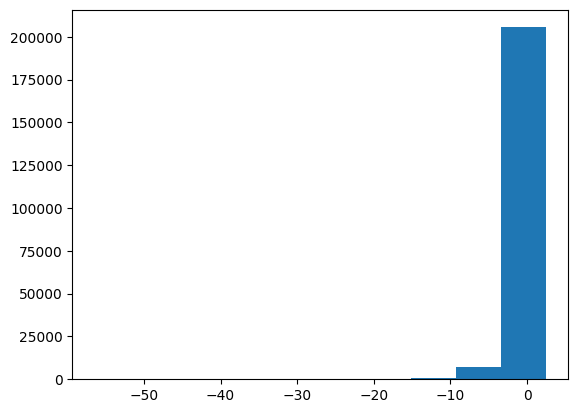

The skewness for feature V2 is  -4.7440371845318925


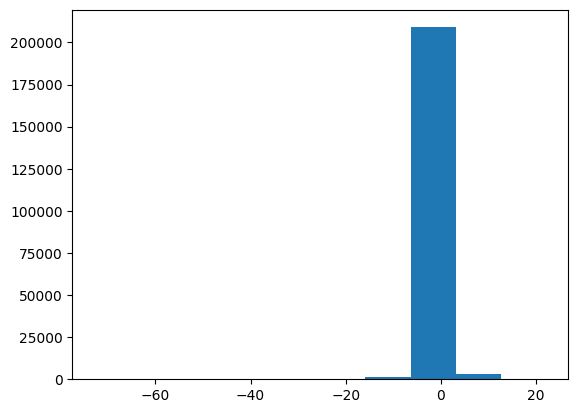

The skewness for feature V3 is  -2.2859237958743943


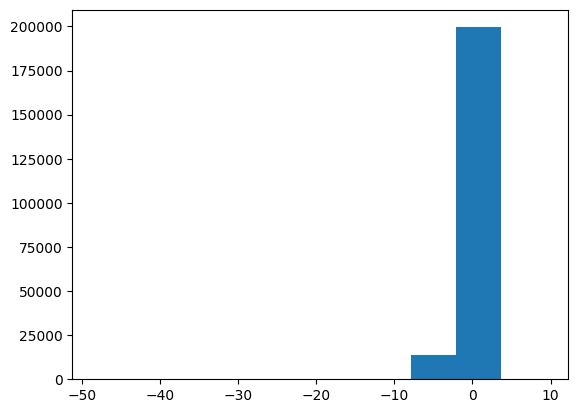

The skewness for feature V4 is  0.6913998695980692


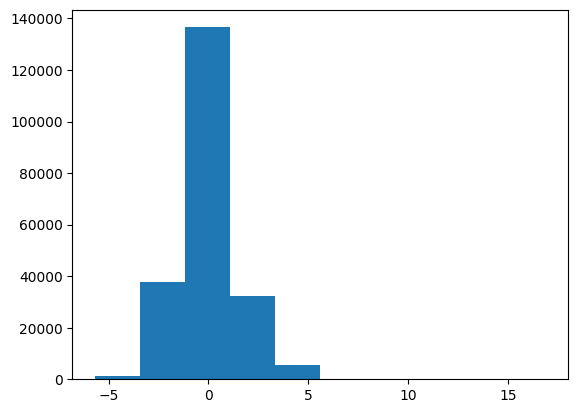

The skewness for feature V5 is  -2.8774512236250427


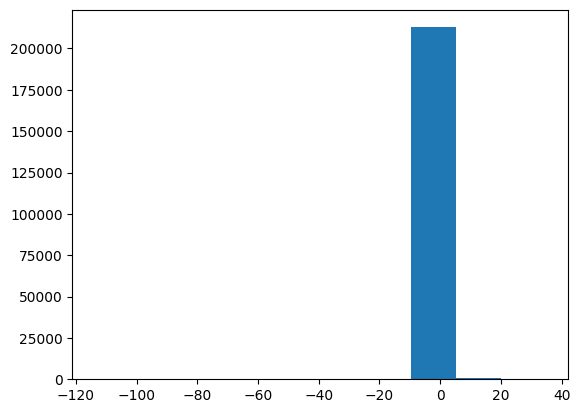

The skewness for feature V6 is  1.9628128032253391


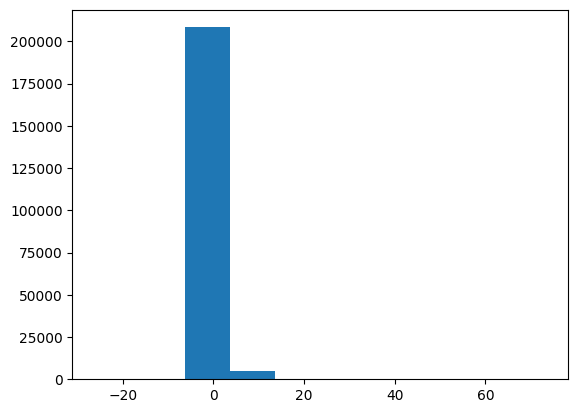

The skewness for feature V7 is  3.3252518182693023


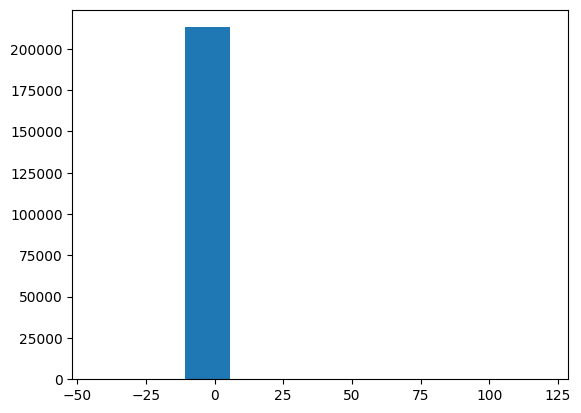

The skewness for feature V8 is  -8.689868787663782


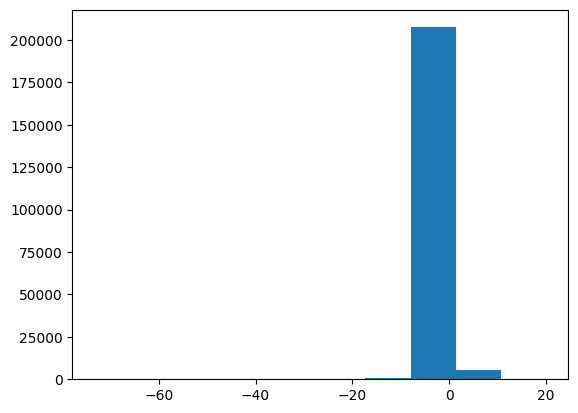

The skewness for feature V9 is  0.5451846506069509


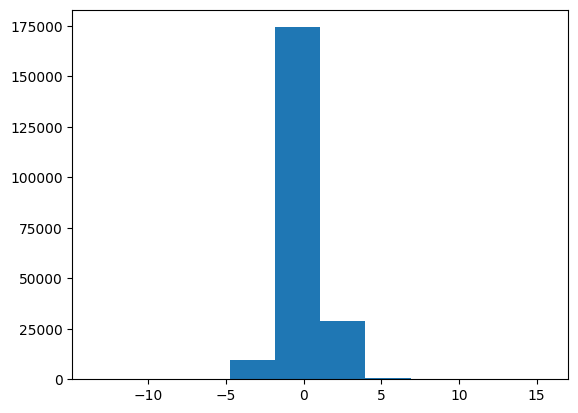

The skewness for feature V10 is  1.107482466756215


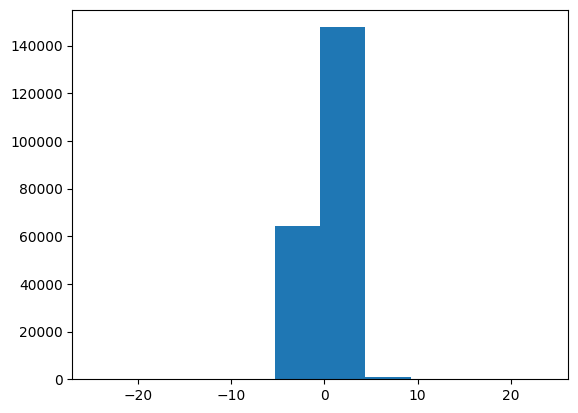

The skewness for feature V11 is  0.3634732318327359


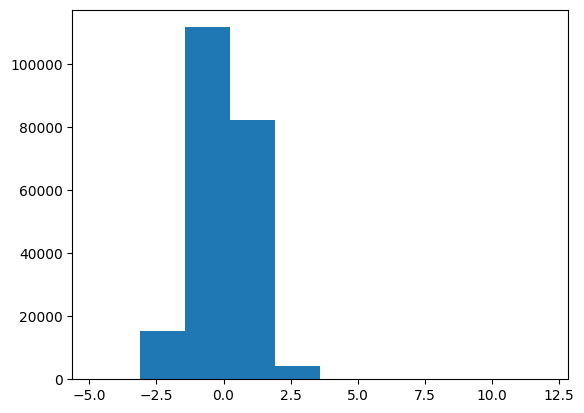

The skewness for feature V12 is  -2.3286297072216233


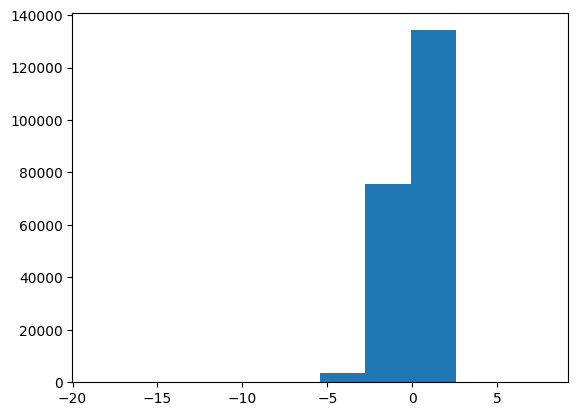

The skewness for feature V13 is  0.06453740439096665


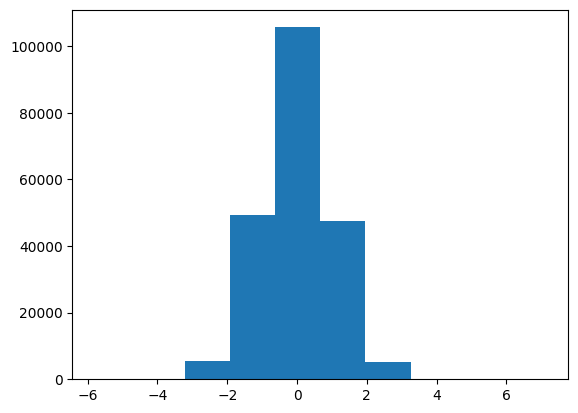

The skewness for feature V14 is  -1.991184024545025


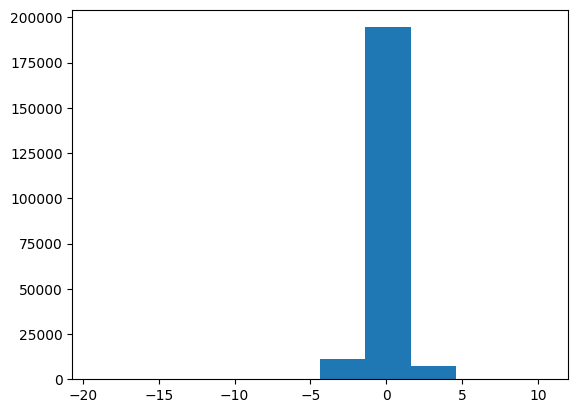

The skewness for feature V15 is  -0.3101351436031036


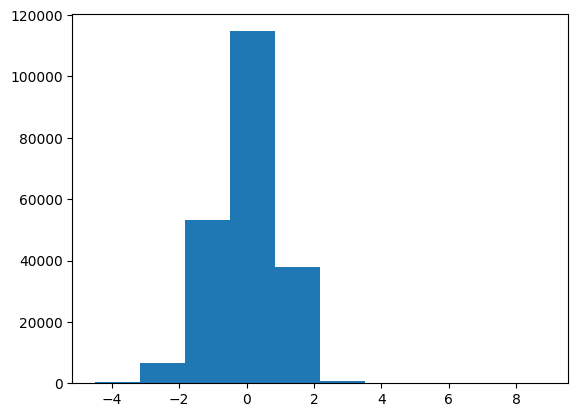

The skewness for feature V16 is  -1.1033005074451556


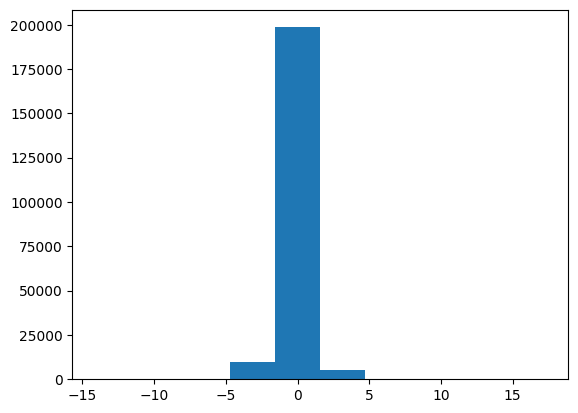

The skewness for feature V17 is  -3.8642118684753224


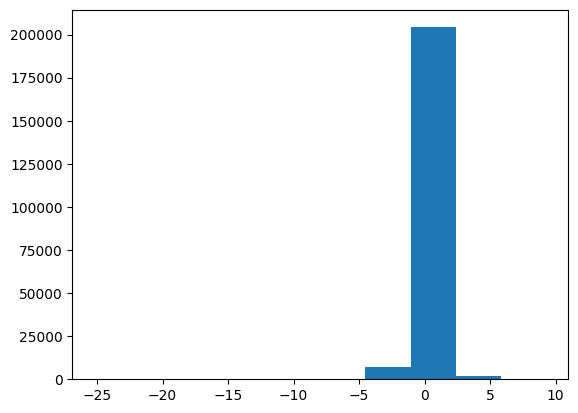

The skewness for feature V18 is  -0.2631677407624353


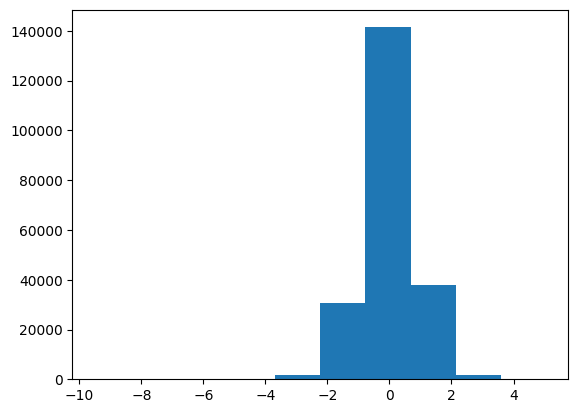

The skewness for feature V19 is  0.11389047737065637


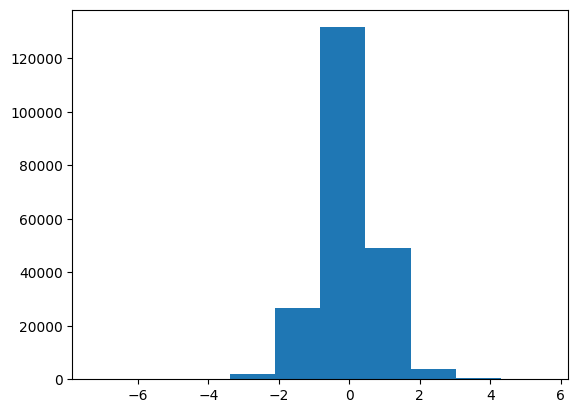

The skewness for feature V20 is  -2.178295858013219


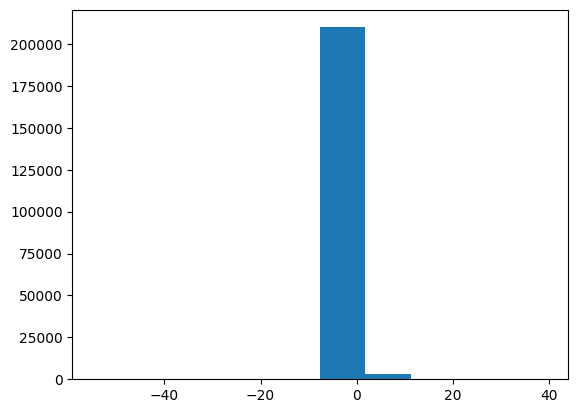

The skewness for feature V21 is  3.5587610590003975


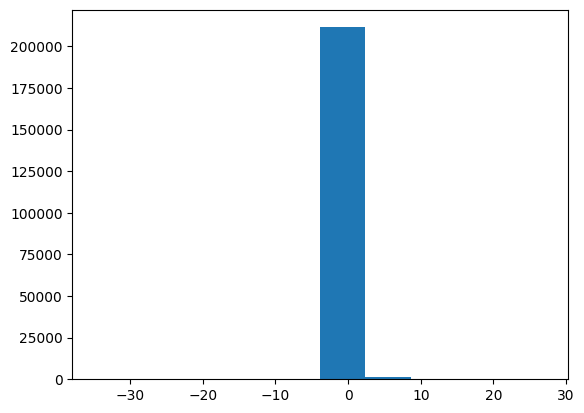

The skewness for feature V22 is  -0.22482964663545355


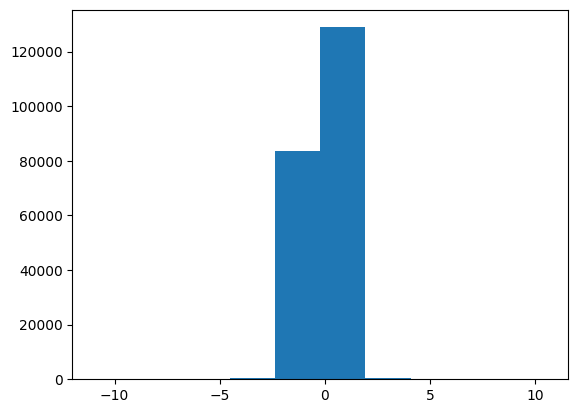

The skewness for feature V23 is  -6.405002761395167


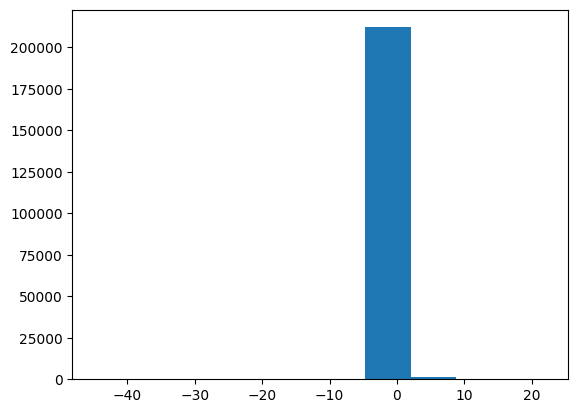

The skewness for feature V24 is  -0.5503442705163184


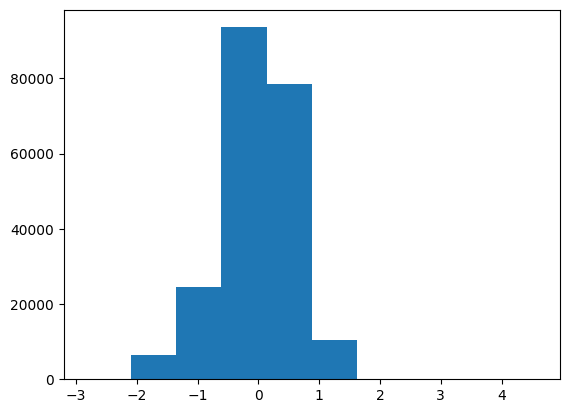

The skewness for feature V25 is  -0.41946056202443716


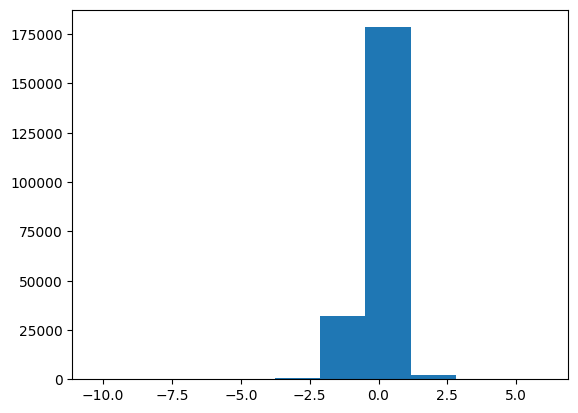

The skewness for feature V26 is  0.5781403714654063


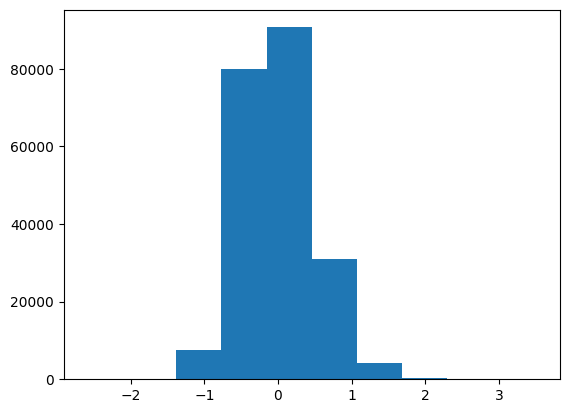

The skewness for feature V27 is  -0.7435450782527174


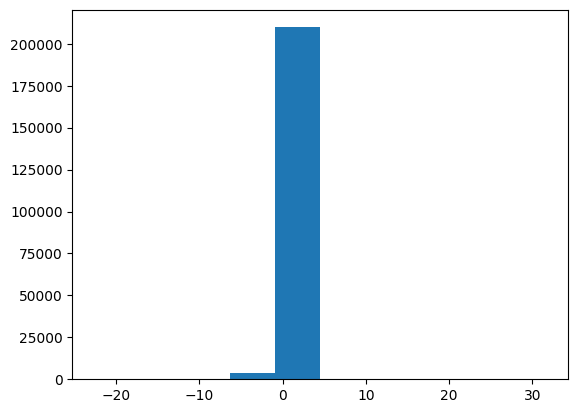

The skewness for feature V28 is  9.934961966267563


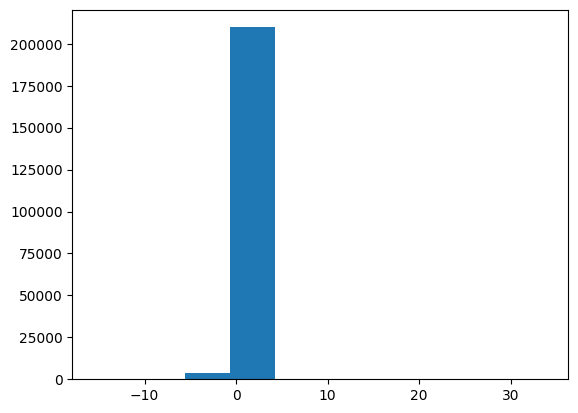

The skewness for feature Amount is  18.464338647936955


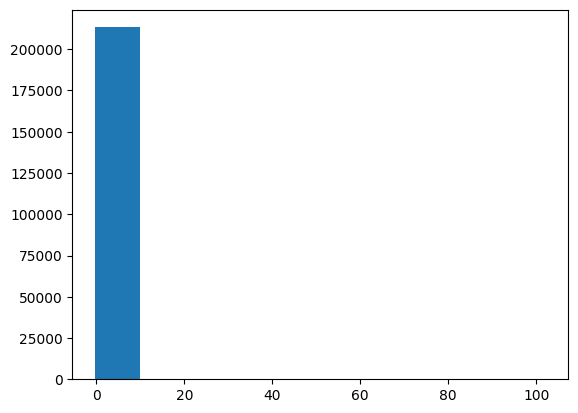

In [29]:
# hist plot for features and their skewness
for i in X_train.columns:
  print(f'The skewness for feature {i} is ',X_train[i].skew())
  plt.hist(X_train[i])
  plt.show()

In [30]:
# list of features with high skewness value
skewness = []
feature = []
for i in X_train.columns:
  feature.append(i)
  skewness.append(X_train[i].skew())
skew_kurt_df = pd.DataFrame({'features': feature,
              'skewness': skewness})
feat = list(skew_kurt_df[((skew_kurt_df['skewness']>=2)|(skew_kurt_df['skewness']<=-2))]['features'])

In [31]:
#Using PowerTransformer to make features guassian
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)
X_train[feat] = pt.fit_transform(X_train[feat])
X_test[feat] = pt.transform(X_test[feat])

The skewness for feature V1 is  -0.2179391225197574


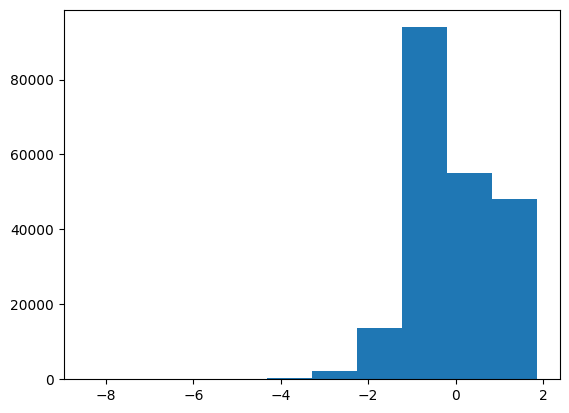

The skewness for feature V2 is  0.3393725691275801


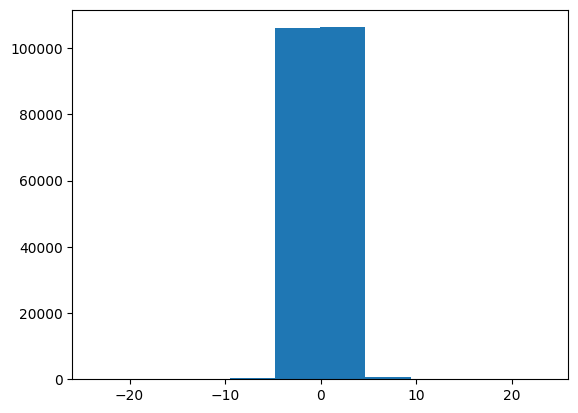

The skewness for feature V3 is  -0.07950094355089844


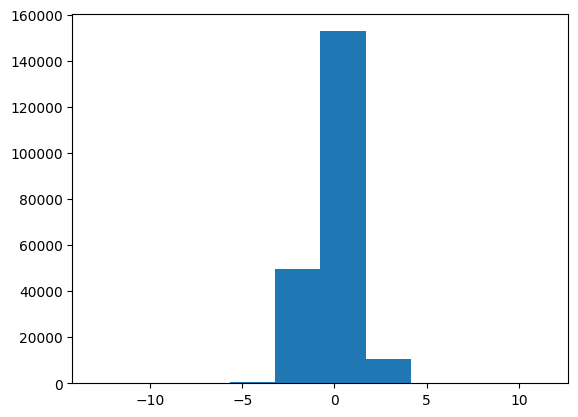

The skewness for feature V4 is  0.6913998695980692


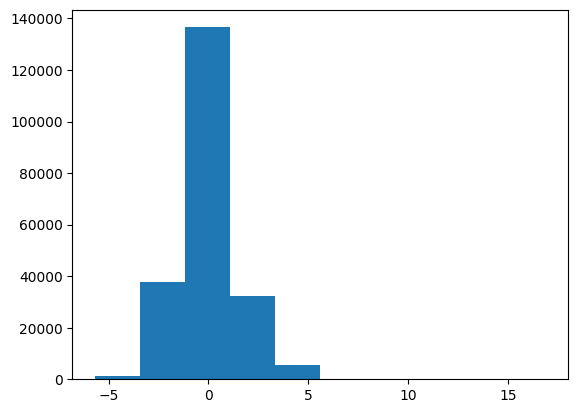

The skewness for feature V5 is  -1.415986835072113


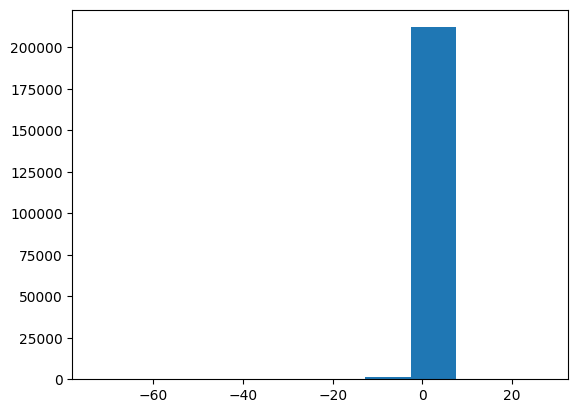

The skewness for feature V6 is  1.9628128032253391


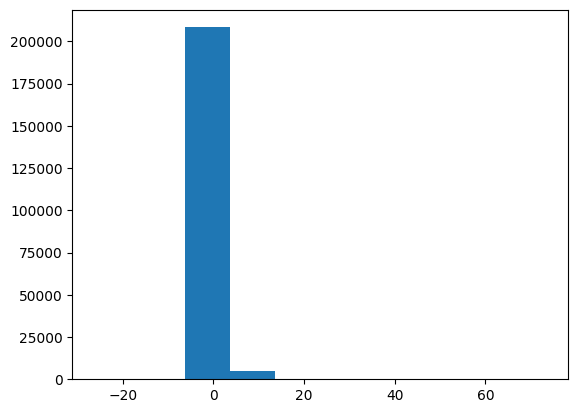

The skewness for feature V7 is  3.059857038350342


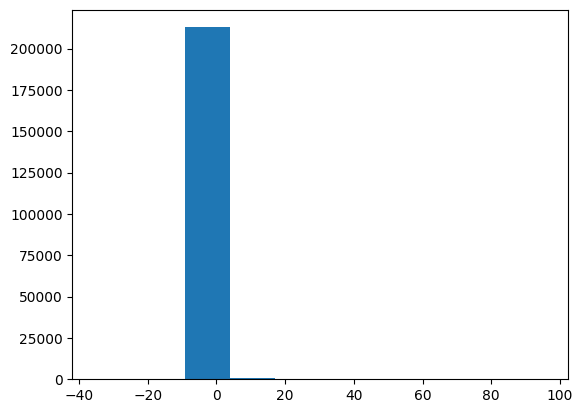

The skewness for feature V8 is  2.3720586104392063


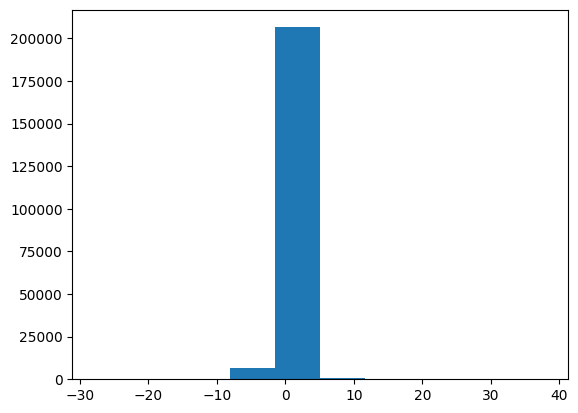

The skewness for feature V9 is  0.5451846506069509


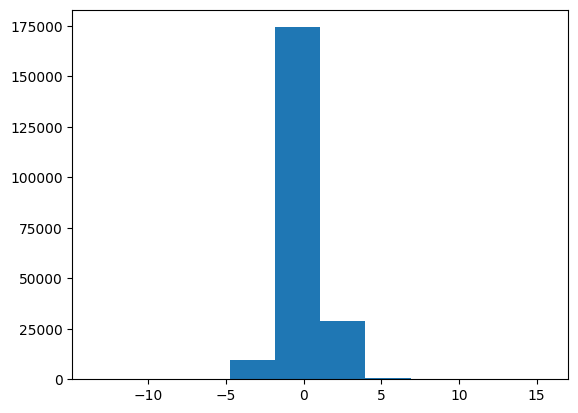

The skewness for feature V10 is  1.107482466756215


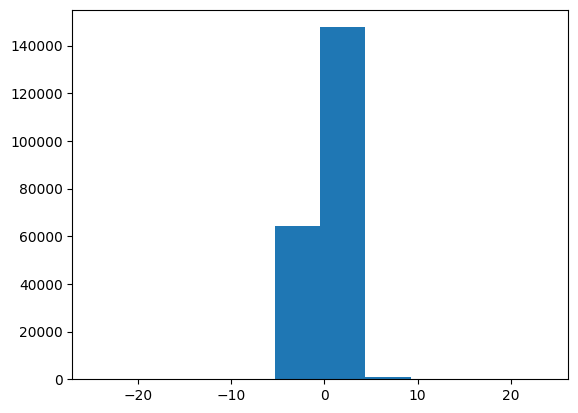

The skewness for feature V11 is  0.3634732318327359


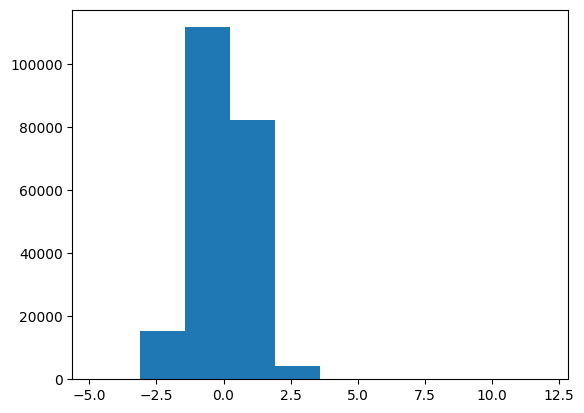

The skewness for feature V12 is  0.16455959970290057


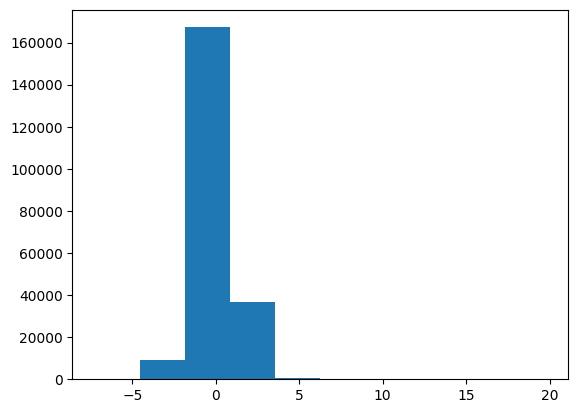

The skewness for feature V13 is  0.06453740439096665


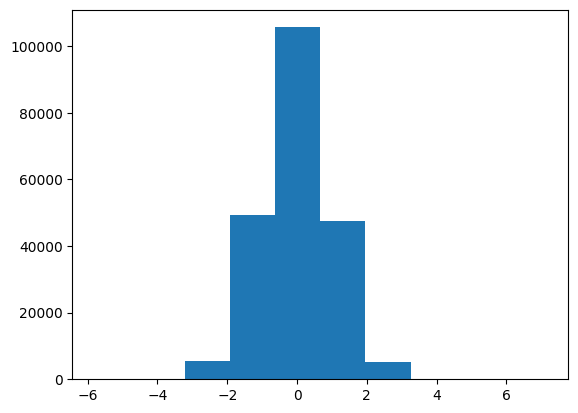

The skewness for feature V14 is  -1.991184024545025


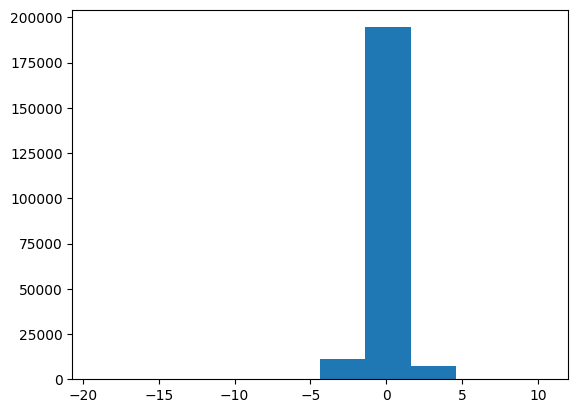

The skewness for feature V15 is  -0.3101351436031036


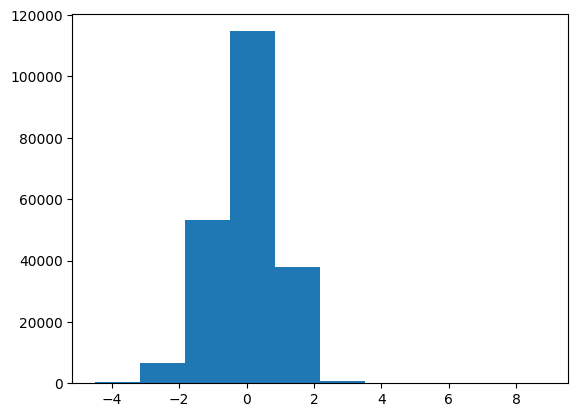

The skewness for feature V16 is  -1.1033005074451556


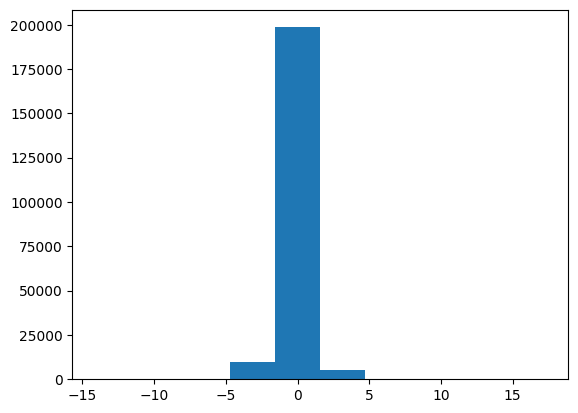

The skewness for feature V17 is  -0.7895527594260203


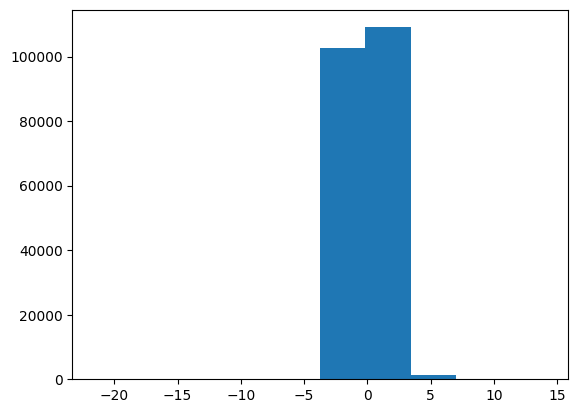

The skewness for feature V18 is  -0.2631677407624353


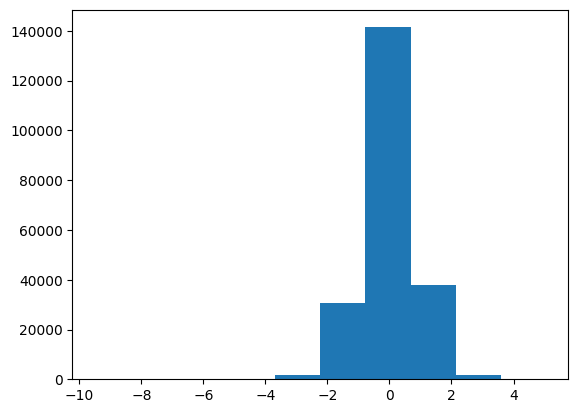

The skewness for feature V19 is  0.11389047737065637


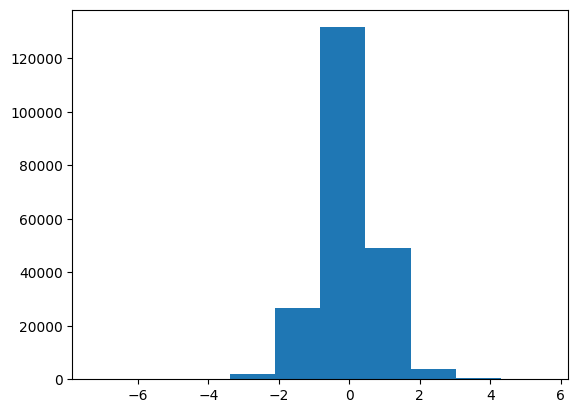

The skewness for feature V20 is  -0.827070791941477


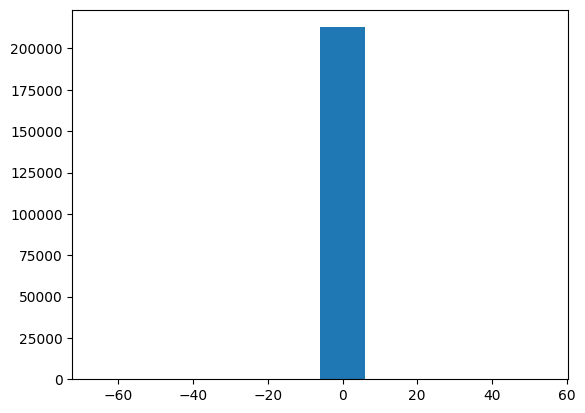

The skewness for feature V21 is  -2.1511353721021655


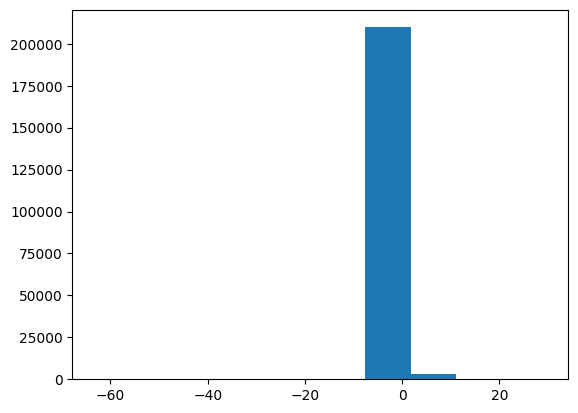

The skewness for feature V22 is  -0.22482964663545355


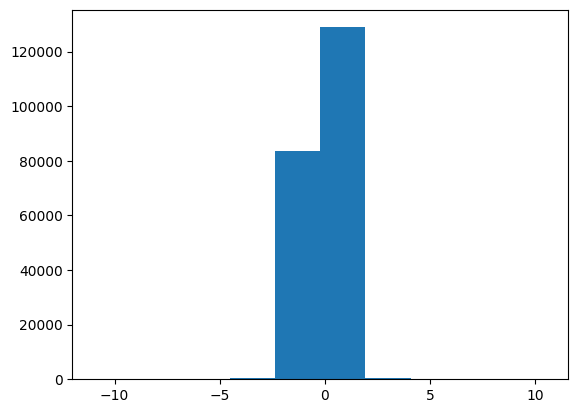

The skewness for feature V23 is  -0.2778965314890329


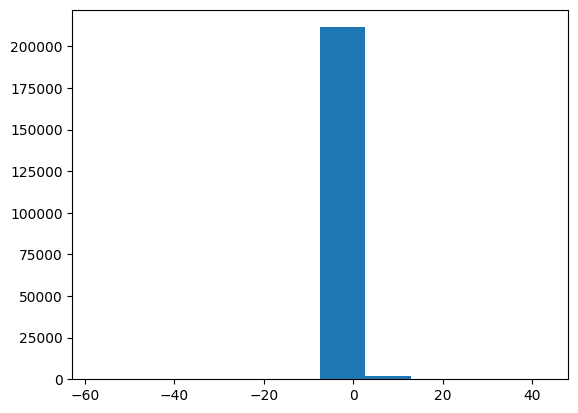

The skewness for feature V24 is  -0.5503442705163184


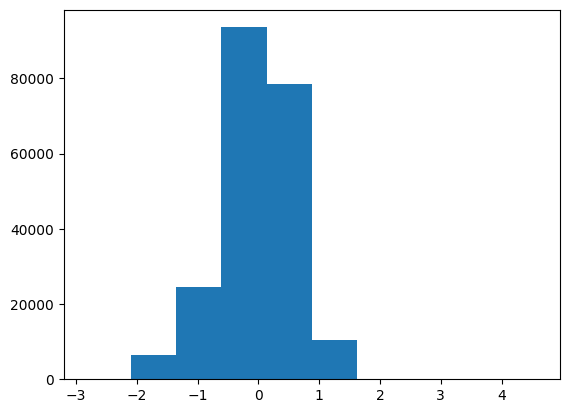

The skewness for feature V25 is  -0.41946056202443716


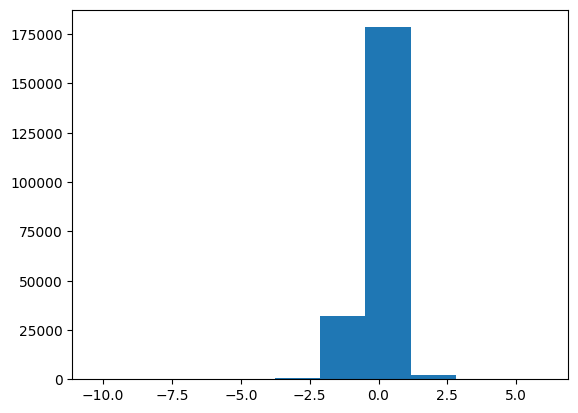

The skewness for feature V26 is  0.5781403714654063


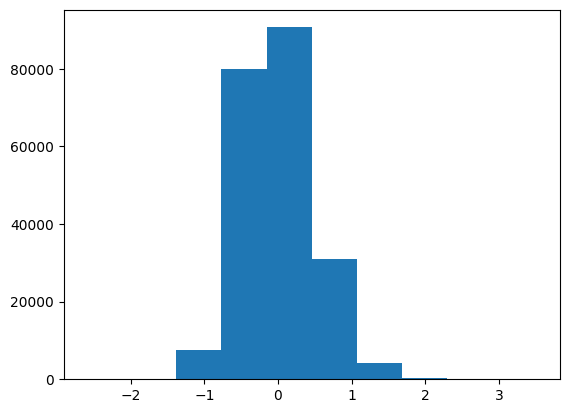

The skewness for feature V27 is  -0.7435450782527174


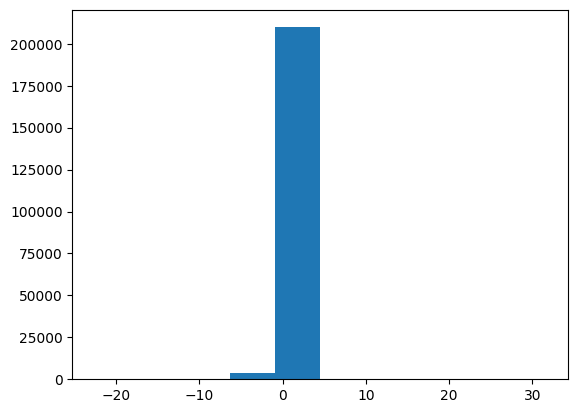

The skewness for feature V28 is  1.2815181679419305


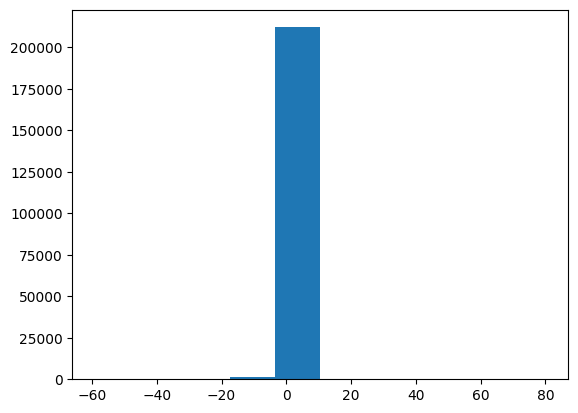

The skewness for feature Amount is  0.7054083613921657


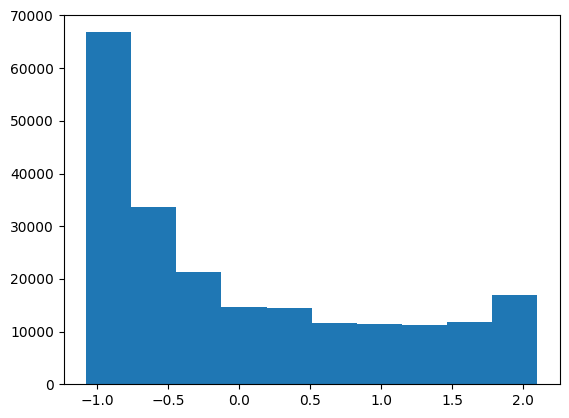

In [32]:
# hist plot for variables after transformation
for i in X_train.columns:
  print(f'The skewness for feature {i} is ',X_train[i].skew())
  plt.hist(X_train[i])
  plt.show()

## Class Balancing

In [33]:
#class balancing with smote
smt = SMOTE(random_state = 42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
print(len(X_train_smt))
print(y_train_smt.value_counts())

426472
0    213236
1    213236
Name: Class, dtype: int64


In [ ]:
# class balancing with adasyn
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print(len(X_train_ada))
print(y_train_ada.value_counts())

426498
1    213262
0    213236
Name: Class, dtype: int64


In [ ]:
smt_tmk = SMOTETomek(random_state=42)
X_train_smt_tmk, y_train_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
print(len(X_train_smt_tmk))
print(y_train_smt_tmk.value_counts())

426472
0    213236
1    213236
Name: Class, dtype: int64


## Model Building

####KNeighborsClassifier with SMOTE

In [ ]:
# StratifiedKFold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

#param distribution
param_distributions = {'n_neighbors': [5,7,9,11]}

#KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

#RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn,
                                       param_distributions = param_distributions,
                                       cv=cv,
                                       verbose=1,
                                       n_jobs=-1,
                                       scoring='recall')

#fit
random_search_knn.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_knn.best_score_

1.0

In [ ]:
#best estimator
random_search_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1)

In [ ]:
#best params
random_search_knn.best_params_

{'n_neighbors': 5}

In [ ]:
knn_smt_best = random_search_knn.best_estimator_

In [ ]:
#Predictions
y_pred_knn_smt = knn_smt_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_knn_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.48      0.87      0.62       123

    accuracy                           1.00     71202
   macro avg       0.74      0.93      0.81     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_knn_smt))

0.9341574249744101


In [ ]:
# saving model
import joblib
joblib.dump(knn_smt_best, '/content/drive/MyDrive/Capstone_project/knn_smt_best.pk1')

['/content/drive/MyDrive/Capstone_project/knn_smt_best.pk1']

In [ ]:
import os

# Check if the file exists
if os.path.exists('/content/drive/MyDrive/Capstone_project/knn_smt_best.pk1'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

Model file exists.


#### Observation
- The KNeighborsClassifier trained on SMOTE balanced dataset is able to obtain a **precision score of 0.48**, **recall score of 0.87** and **roc_auc_score of 0.9341**
- The precision of this model is less than 0.5

####KNeighborsClassifier with ADASYN

In [ ]:
# StratifiedKFold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

#param distribution
param_distributions = {'n_neighbors': [5,7,9,11]}

#KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

#RandomizedSearchCV
random_search_knn_ada = RandomizedSearchCV(estimator=knn,
                                       param_distributions = param_distributions,
                                       cv=cv,
                                       verbose=1,
                                       n_jobs=-1,
                                       scoring='recall')

#fit
random_search_knn_ada.fit(X_train_ada, y_train_ada)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_knn_ada.best_score_

1.0

In [ ]:
#best estimators
random_search_knn_ada.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [ ]:
knn_ada_best = random_search_knn_ada.best_estimator_

In [ ]:
#prediction
y_pred_knn_ada = knn_ada_best.predict(X_test)

In [ ]:
# classification report
print(classification_report(y_test, y_pred_knn_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.40      0.87      0.55       123

    accuracy                           1.00     71202
   macro avg       0.70      0.93      0.77     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_knn_ada))

0.9338408757826657


In [ ]:
# saving model
import joblib
joblib.dump(knn_ada_best, '/content/drive/MyDrive/Capstone_project/knn_ada_best.pk1')

['/content/drive/MyDrive/Capstone_project/knn_ada_best.pk1']

In [ ]:
import os

# Check if the file exists
if os.path.exists('/content/drive/MyDrive/Capstone_project/knn_ada_best.pk1'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

Model file exists.


####Observation
- The KNeighboursClassifier trained on ADASYN balanced dataset has a **precision score of 0.40**, **recall score of 0.87** and **roc_auc_score of 0.9338**.
- The precision for the model is less than 0.5

####KNeighborsClassifier with SMOTETomek

In [ ]:
# StratifiedKFold
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

#param distribution
param_distributions = {'n_neighbors': [5,7,9,11]}

#KNeighborsClassifier
knn_smt_tmk = KNeighborsClassifier(n_jobs=-1)

#RandomizedSearchCV
random_search_knn_smt_tmk = RandomizedSearchCV(estimator=knn_smt_tmk,
                                       param_distributions = param_distributions,
                                       cv=cv,
                                       verbose=1,
                                       n_jobs=-1,
                                       scoring='recall')

#fit
random_search_knn_smt_tmk.fit(X_train_smt_tmk, y_train_smt_tmk)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_knn_smt_tmk.best_score_

1.0

In [ ]:
#best estimator
random_search_knn_smt_tmk.best_estimator_

KNeighborsClassifier(n_jobs=-1)

In [ ]:
#best params
random_search_knn_smt_tmk.best_params_

{'n_neighbors': 5}

In [ ]:
knn_smt_tmk_best = random_search_knn_smt_tmk.best_estimator_

In [ ]:
#prediction
y_pred_knn_smt_tmk = knn_smt_tmk_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_knn_smt_tmk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.48      0.87      0.62       123

    accuracy                           1.00     71202
   macro avg       0.74      0.93      0.81     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_knn_smt_tmk))

0.9341574249744101


In [ ]:
# saving model
import joblib
joblib.dump(knn_smt_tmk_best, '/content/drive/MyDrive/Capstone_project/knn_smt_tmk_best.pk1')

['/content/drive/MyDrive/Capstone_project/knn_smt_tmk_best.pk1']

In [ ]:
import os

# Check if the file exists
if os.path.exists('/content/drive/MyDrive/Capstone_project/knn_ada_best.pk1'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

Model file exists.


#### Observation
- The KneighborsClassifier trained on SMOTETomek balanced dataset has a **precision score of 0.48**, **recall score of 0.87** and **roc_auc_score of 0.9341**
- The precison score for the model is less than 0.5.  

- *Although all the KneighborClassifier models trained have a high recall and roc_auc_score but they all have low precision score*

## Random Forest Classifier

#### Random Forest Classifier With SMOTE

In [ ]:
# stratifiedkfold
cv = StratifiedKFold(n_splits=4,
                     shuffle=True,
                     random_state=42)
# RandomForestClassifier
rf_smt = RandomForestClassifier(random_state=42)

#parameters
param_grid = {
    'n_estimators': [50,100,250,500],
    'max_depth' : [5,7,10,15],
    'min_samples_split': [30,50]
}

#RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf_smt,
                           param_distributions=param_grid,
                           cv=cv,
                           n_jobs=-1,
                           scoring='recall',
                           verbose=1)

random_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 15],
                                        'min_samples_split': [30, 50],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search.best_score_

0.9993903468457483

In [ ]:
#best estimator
random_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=500,
                       random_state=42)

In [ ]:
rf_smt_best = random_search.best_estimator_

In [ ]:
# saving model
import joblib
joblib.dump(rf_smt_best, '/content/drive/MyDrive/Capstone_project/rf_smt_best.pk1')

['/content/drive/MyDrive/Capstone_project/rf_smt_best.pk1']

In [ ]:
import os

# Check if the file exists
if os.path.exists('/content/drive/MyDrive/Capstone_project/rf_smt_best.pk1'):
    print("Model file exists.")
else:
    print("Model file does not exist.")


Model file exists.


In [ ]:
# predictions
y_pred_smt = rf_smt_best.predict(X_test)

In [ ]:
#classification_report
print(classification_report(y_test, y_pred_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.63      0.81      0.71       123

    accuracy                           1.00     71202
   macro avg       0.82      0.91      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc score
print(roc_auc_score(y_test, y_pred_smt))

0.9060960683046244


##Observation
- The Random Forest model trained with SMOTE balanced dataset is having a **recall score of 0.81** and **precision score of 0.63** with the **roc_auc_score at 0.906**.

#### Random Forest Classifier With ADASYN

In [ ]:
# stratified k fold
cv = StratifiedKFold(n_splits=4,
                     random_state=42,
                     shuffle=True)

#random forest classifier
rf_ada = RandomForestClassifier(random_state=42)

#parameters
param_grid = {
    'n_estimators': [50,100,250,500],
    'max_depth' : [5,7,10,15],
    'min_samples_split': [30,50]
}

#RandomizedSearchCV
random_search_ada = RandomizedSearchCV(estimator = rf_ada,
                           param_distributions=param_grid,
                           cv=cv,
                           n_jobs=-1,
                           scoring='recall',
                           verbose=1)

random_search_ada.fit(X_train_ada, y_train_ada)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 15],
                                        'min_samples_split': [30, 50],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_ada.best_score_

0.9999906217762355

In [ ]:
#best estimator
random_search_ada.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=250,
                       random_state=42)

In [ ]:
rf_ada_best = random_search_ada.best_estimator_

In [ ]:
# saving model
import joblib
joblib.dump(rf_ada_best, '/content/drive/MyDrive/Capstone_project/rf_ada_best.pk1')

['/content/drive/MyDrive/Capstone_project/rf_ada_best.pk1']

In [ ]:
import os

# Check if the file exists
if os.path.exists('/content/drive/MyDrive/Capstone_project/rf_smt_best.pk1'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

Model file exists.


In [ ]:
# predictions
y_pred_ada = rf_ada_best.predict(X_test)

In [ ]:
#classification_report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.33      0.80      0.47       123

    accuracy                           1.00     71202
   macro avg       0.67      0.90      0.74     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_ada))

0.9010532423730518


##Observation
- The Random Forest model trained with ADASYN balanced dataset has a **recall score of 0.80**, **precision score of 0.33** and **roc_auc_score at 0.901**.

####Random Forest Classifier With SMOTETomek

In [ ]:
# stratifiedkfold
cv = StratifiedKFold(n_splits=4,
                     shuffle=True,
                     random_state=42)
# RandomForestClassifier
rf_smt_tmk = RandomForestClassifier(random_state=42)

#parameters
param_grid = {
    'n_estimators': [50,100,250,500],
    'max_depth' : [5,7,10,15],
    'min_samples_split': [30,50]
}

#RandomizedSearchCV
random_search_smt_tmk = RandomizedSearchCV(estimator = rf_smt_tmk,
                           param_distributions=param_grid,
                           cv=cv,
                           n_jobs=-1,
                           scoring='recall',
                           verbose=1)

random_search_smt_tmk.fit(X_train_smt_tmk, y_train_smt_tmk)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 10, 15],
                                        'min_samples_split': [30, 50],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_smt_tmk.best_score_

0.9996060702695605

In [ ]:
#best estimator
random_search_smt_tmk.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=30, n_estimators=500,
                       random_state=42)

In [ ]:
rf_smt_tmk_best = random_search_smt_tmk.best_estimator_

In [ ]:
import joblib
joblib.dump(rf_smt_tmk_best, '/content/drive/MyDrive/Capstone_project/rf_smt_tmk_best.pk1')

['/content/drive/MyDrive/Capstone_project/rf_smt_tmk_best.pk1']

In [ ]:
import os
if os.path.exists('/content/drive/MyDrive/Capstone_project/rf_smt_tmk_best.pk1'):
  print('Model file exists')
else:
  print('Model file does not exist')

Model file exists


In [ ]:
#prediction
y_pred_smt_tmk = rf_smt_tmk_best.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smt_tmk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.65      0.82      0.73       123

    accuracy                           1.00     71202
   macro avg       0.83      0.91      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_smt_tmk))

0.9101892466609637


- The Random Forest model trained with SMOTETomek class balanced dataset has a **precision score of 0.65**, **recall score of 0.82** and **roc_auc_score of 0.910**

#### Observation
- Out of the three mehods of class balancing that we used to train **RandomForestClassifier**, **SMOTETomek** seems to be performing best with **precision-0.65, recall-0.82 and roc_auc_score-0.910** which is slightly better than SMOTE and a lot better than ADASYN.

## XGBoost Classifier

####XGBoost Classifier with SMOTE

In [ ]:
#StratifiedKFold
cv = StratifiedKFold(n_splits=4,
                     shuffle=True,
                     random_state=42)
#XGBClassifier
xgb_smt = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', random_state=42, tree_method='gpu_hist')

#param_distribution
param_distributions = {'n_estimators': [50,100,250,500],
                      'learning_rate':[0.01, 0.05, 0.1, 0.25],
                      'max_depth': [5,10,15,20]}

#RandomizedSearchCV
random_search_xgb_smt = RandomizedSearchCV(estimator=xgb_smt,
                                           param_distributions=param_distributions,
                                           scoring='recall',
                                           n_jobs=-1,
                                           verbose=1,
                                           cv=cv)

#fit
random_search_xgb_smt.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_xgb_smt.best_score_

1.0

In [ ]:
#best estimator
random_search_xgb_smt.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb_smt_best = random_search_xgb_smt.best_estimator_

In [ ]:
y_pred_xgb_smt = xgb_smt_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_xgb_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.79      0.85      0.82       123

    accuracy                           1.00     71202
   macro avg       0.90      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
print(roc_auc_score(y_test, y_pred_xgb_smt))

0.9225742981272298


## Observation
- The XGBoost model trained on SMOTE class balanced dataset has a **precison score of 0.79**, **recall score of 0.85** and **roc_auc_score of 0.9225**

In [ ]:
import joblib
joblib.dump(xgb_smt_best, '/content/drive/MyDrive/Capstone_project/xgb_smt_best.pk1')

['/content/drive/MyDrive/Capstone_project/xgb_smt_best.pk1']

In [ ]:
import os
if os.path.exists('/content/drive/MyDrive/Capstone_project/xgb_smt_best.pk1'):
  print('Model file exists')
else:
  print('Model file does not exist')

Model file exists


In [ ]:
feature_names = X_train_smt.columns
feature_importance_dict = dict(zip(range(len(feature_names)), feature_names))

# Print or analyze the feature importances along with their corresponding feature names
for idx, importance in enumerate(random_search_xgb_smt.best_estimator_.feature_importances_):
    print(f"Feature: {feature_importance_dict[idx]}, Importance: {importance}")

Feature: V1, Importance: 0.0070846956223249435
Feature: V2, Importance: 0.005384188145399094
Feature: V3, Importance: 0.014020079746842384
Feature: V4, Importance: 0.05498378723859787
Feature: V5, Importance: 0.004174684640020132
Feature: V6, Importance: 0.005873513408005238
Feature: V7, Importance: 0.00810577254742384
Feature: V8, Importance: 0.020832490175962448
Feature: V9, Importance: 0.006084675434976816
Feature: V10, Importance: 0.016669271513819695
Feature: V11, Importance: 0.009278744459152222
Feature: V12, Importance: 0.03116285428404808
Feature: V13, Importance: 0.010683148168027401
Feature: V14, Importance: 0.7003852128982544
Feature: V15, Importance: 0.01055589597672224
Feature: V16, Importance: 0.007889862172305584
Feature: V17, Importance: 0.011118513531982899
Feature: V18, Importance: 0.008036423474550247
Feature: V19, Importance: 0.009247619658708572
Feature: V20, Importance: 0.004401716869324446
Feature: V21, Importance: 0.0066581652499735355
Feature: V22, Importance: 

#### XGBoost Classifer with ADASYN

In [ ]:
#StratifiedKFold
cv = StratifiedKFold(n_splits=4,
                     shuffle=True,
                     random_state=42)
#XGBClassifier
xgb_ada = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', random_state=42, tree_method='gpu_hist')

#param_distribution
param_distributions = {'n_estimators': [50,100,250,500],
                      'learning_rate':[0.01, 0.05, 0.1, 0.25],
                      'max_depth': [5,10,15,20]}

#RandomizedSearchCV
random_search_xgb_ada = RandomizedSearchCV(estimator=xgb_ada,
                                           param_distributions=param_distributions,
                                           scoring='recall',
                                           n_jobs=-1,
                                           verbose=1,
                                           cv=cv)

#fit
random_search_xgb_ada.fit(X_train_ada, y_train_ada)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_xgb_ada.best_score_

0.9999906217762355

In [ ]:
#best parameter
random_search_xgb_ada.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb_ada_best = random_search_xgb_ada.best_estimator_

In [ ]:
y_pred_xgb_ada = xgb_ada_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_xgb_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.75      0.84      0.79       123

    accuracy                           1.00     71202
   macro avg       0.87      0.92      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_xgb_ada))

0.9184529820649576


## Observation
- The model trained on ADASYN class imbalance dataset has a **pricison score of 0.75**, **recall score of 0.84** and **roc_auc_score of 0.9184**.

In [ ]:
import joblib
joblib.dump(xgb_smt_best, '/content/drive/MyDrive/Capstone_project/xgb_ada_best.pk1')

['/content/drive/MyDrive/Capstone_project/xgb_ada_best.pk1']

In [ ]:
import os
if os.path.exists('/content/drive/MyDrive/Capstone_project/xgb_smt_best.pk1'):
  print('Model file exists')
else:
  print('Model file does not exist')

Model file exists


In [ ]:
feature_names = X_train_ada.columns
feature_importance_dict = dict(zip(range(len(feature_names)), feature_names))

# Print or analyze the feature importances along with their corresponding feature names
for idx, importance in enumerate(random_search_xgb_ada.best_estimator_.feature_importances_):
    print(f"Feature: {feature_importance_dict[idx]}, Importance: {importance}")

Feature: V1, Importance: 0.03352790325880051
Feature: V2, Importance: 0.02049875259399414
Feature: V3, Importance: 0.040811337530612946
Feature: V4, Importance: 0.1700107306241989
Feature: V5, Importance: 0.011415847577154636
Feature: V6, Importance: 0.008401984348893166
Feature: V7, Importance: 0.03721347078680992
Feature: V8, Importance: 0.05969857797026634
Feature: V9, Importance: 0.00987992063164711
Feature: V10, Importance: 0.009677491150796413
Feature: V11, Importance: 0.016312651336193085
Feature: V12, Importance: 0.018878715112805367
Feature: V13, Importance: 0.028644638136029243
Feature: V14, Importance: 0.3146519362926483
Feature: V15, Importance: 0.008395740762352943
Feature: V16, Importance: 0.01390910055488348
Feature: V17, Importance: 0.010675412602722645
Feature: V18, Importance: 0.02043178305029869
Feature: V19, Importance: 0.019081871956586838
Feature: V20, Importance: 0.005619473289698362
Feature: V21, Importance: 0.0193704292178154
Feature: V22, Importance: 0.0117921

#### XGBoost CLassifie with SMOTETomek

In [ ]:
#StratifiedKFold
cv = StratifiedKFold(n_splits=4,
                     shuffle=True,
                     random_state=42)
#XGBClassifier
xgb_smt_tmk = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', random_state=42, tree_method='gpu_hist')

#param_distribution
param_distributions = {'n_estimators': [50,100,250,500],
                      'learning_rate':[0.01, 0.05, 0.1, 0.25],
                      'max_depth': [5,10,15,20]}

#RandomizedSearchCV
random_search_xgb_smt_tmk = RandomizedSearchCV(estimator=xgb_ada,
                                           param_distributions=param_distributions,
                                           scoring='recall',
                                           n_jobs=-1,
                                           verbose=1,
                                           cv=cv)

#fit
random_search_xgb_smt_tmk.fit(X_train_smt_tmk, y_train_smt_tmk)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [50, 100, 250, 500]},
                   scoring='recall', verbose=1)

In [ ]:
#best score
random_search_xgb_smt_tmk.best_score_

1.0

In [ ]:
# best estimator
random_search_xgb_smt_tmk.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
#best params
random_search_xgb_smt_tmk.best_params_

{'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.25}

In [ ]:
xgb_smt_tmk_best = random_search_xgb_smt_tmk.best_estimator_

In [ ]:
#prediction
y_pred_smt_tmk = xgb_smt_tmk_best.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_smt_tmk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.79      0.84      0.81       123

    accuracy                           1.00     71202
   macro avg       0.89      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
#roc_auc_score
print(roc_auc_score(y_test, y_pred_smt_tmk))

0.91850222305034


## Observation
- XGBoost model trained on SMOTETomek class balanced dataset has a **precision score of 0.79**, **recall score of 0.84** and **roc_auc_score of 0.9185**

In [ ]:
import joblib
joblib.dump(xgb_smt_best, '/content/drive/MyDrive/Capstone_project/xgb_smt_tmk_best.pk1')

['/content/drive/MyDrive/Capstone_project/xgb_smt_tmk_best.pk1']

In [ ]:
import os
if os.path.exists('/content/drive/MyDrive/Capstone_project/xgb_smt_tmk_best.pk1'):
  print('Model file exists')
else:
  print('Model file does not exist')

Model file exists


In [ ]:
feature_names = X_train_smt_tmk.columns
feature_importance_dict = dict(zip(range(len(feature_names)), feature_names))

# Print or analyze the feature importances along with their corresponding feature names
for idx, importance in enumerate(random_search_xgb_smt_tmk.best_estimator_.feature_importances_):
    print(f"Feature: {feature_importance_dict[idx]}, Importance: {importance}")

Feature: V1, Importance: 0.006831595208495855
Feature: V2, Importance: 0.004621474072337151
Feature: V3, Importance: 0.014731875620782375
Feature: V4, Importance: 0.05444509536027908
Feature: V5, Importance: 0.003916561137884855
Feature: V6, Importance: 0.005859727039933205
Feature: V7, Importance: 0.009041763842105865
Feature: V8, Importance: 0.02305743284523487
Feature: V9, Importance: 0.005602549761533737
Feature: V10, Importance: 0.01691095530986786
Feature: V11, Importance: 0.00918455608189106
Feature: V12, Importance: 0.031096255406737328
Feature: V13, Importance: 0.011212730780243874
Feature: V14, Importance: 0.6975443363189697
Feature: V15, Importance: 0.009807371534407139
Feature: V16, Importance: 0.0075461650267243385
Feature: V17, Importance: 0.011665795929729939
Feature: V18, Importance: 0.007400307338684797
Feature: V19, Importance: 0.009015360847115517
Feature: V20, Importance: 0.004862779285758734
Feature: V21, Importance: 0.007154874969273806
Feature: V22, Importance: 0

## Observation
- Out of the three mehods of class balancing that we used to train **XGBoostClassifier**, **SMOTE** seems to be performing best with **precision-0.79**, **recall-0.85** and **roc_auc_score-0.9225** which is better than SMOTE and ADASYN.
- The Second best model after Class balancing was Random Forest Classifier with precision-0.65, recall-0.82 and roc_auc_score-0.9101

In [ ]:
result = pd.DataFrame({'Model':['XGBoost+SMOTE', 'XGBoost+ADASYN', 'XGBoost+SMOTETomek', 'RandomForest+SMOTE','RandomForest+ADASYN','RandomForest+SMOTETomek', 'KneighborClassifier+SMOTE','KneighborClassifier+ADASYN', 'KneighborClassifier+SMOTETomek' ],
                       'ROC_AUC_SCORE':[0.9225, 0.9184, 0.9185, 0.9060, 0.9010, 0.9101, 0.9341, 0.9338, 0.9341],
                       'Recall':[0.85, 0.84, 0.84, 0.81, 0.80, 0.82, 0.87, 0.87, 0.87],
                       'Precision':[0.79, 0.75, 0.79, 0.63, 0.33, 0.65, 0.48, 0.40, 0.48]})
result.set_index('Model', inplace=True)
result

ROC_AUC_SCORE  Recall  Precision
Model                                                           
XGBoost+SMOTE                          0.9225    0.85       0.79
XGBoost+ADASYN                         0.9184    0.84       0.75
XGBoost+SMOTETomek                     0.9185    0.84       0.79
RandomForest+SMOTE                     0.9060    0.81       0.63
RandomForest+ADASYN                    0.9010    0.80       0.33
RandomForest+SMOTETomek                0.9101    0.82       0.65
KneighborClassifier+SMOTE              0.9341    0.87       0.48
KneighborClassifier+ADASYN             0.9338    0.87       0.40
KneighborClassifier+SMOTETomek         0.9341    0.87       0.48

[16:49:01] WARNING: ../src/gbm/gbtree.cc:415: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
[16:49:01] WARNING: ../src/gbm/gbtree.cc:425: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
[16:49:01] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


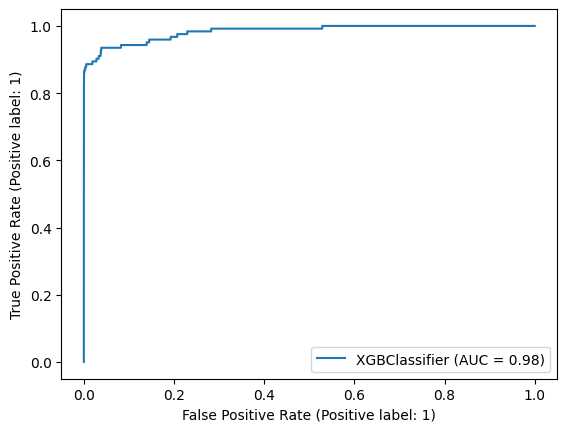

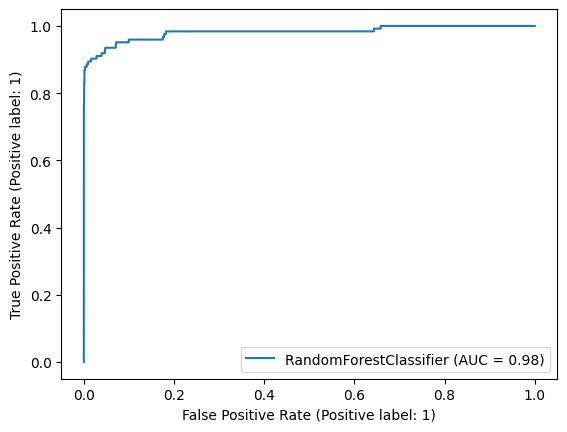

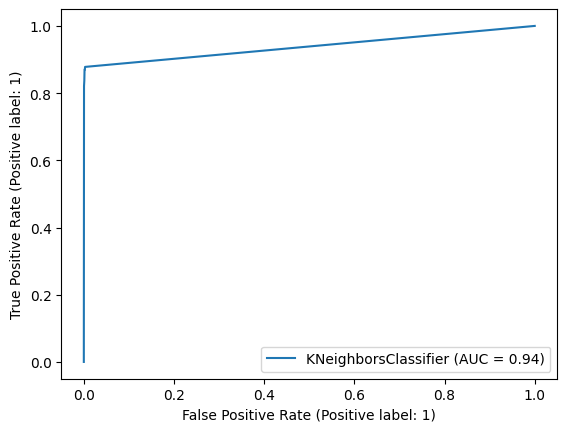

In [ ]:
xgb_best = joblib.load('/content/drive/MyDrive/Capstone_project/xgb_smt_best.pk1')
rf_best = joblib.load('/content/drive/MyDrive/Capstone_project/rf_smt_tmk_best.pk1')
knn_best = joblib.load('/content/drive/MyDrive/Capstone_project/knn_smt_best.pk1')
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(xgb_best, X_test, y_test)
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
plt.show()

## Final Observation
- XGBoostClassifier model trained on SMOTE balanced dataset is the best performing model among all with precision-0.79, recall-0.85 and roc_auc_score-0.9225